# <center> Personalized cancer diagnosis

---

> A multiclass classification problem in medical/pharma domain 





<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC) </p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>

<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC) </p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>

<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>



<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement. 
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection  import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from tqdm import tqdm
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# 1&2 :  Apply All the models with tf-idf features (Replace CountVectorizer with tfidfVectorizer and run the same cells) use only the top 1000 words based of tf-idf values

<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [23]:
data = pd.read_csv('/content/drive/My Drive/Workbook Applied AI/Python_AppliedAI/Case Studies/Cancer/training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [24]:
# note the seprator in this file
data_text =pd.read_csv("/content/drive/My Drive/Workbook Applied AI/Python_AppliedAI/Case Studies/Cancer/training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


<h3>3.1.3. Preprocessing of text</h3>

In [25]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# loading stop words from nltk library
# from nltk.corpus import stopwords # Natural language toolkit library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string  # data_text is dataframe: data_text[TEXT][0 to 3321]

In [27]:
"""
for index, row in data_text.iterrows():
  #rint(index)
  if index < 10:
    print(row["TEXT"])
    """

'\nfor index, row in data_text.iterrows():\n  #rint(index)\n  if index < 10:\n    print(row["TEXT"])\n    '

In [28]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 30.658217999999998 seconds


In [29]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [30]:
result.isnull().sum()

# Seems there are total 5 rows have null values in text column

ID           0
Gene         0
Variation    0
Class        0
TEXT         5
dtype: int64

In [31]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [32]:
# loc will use row name, to pick all the columns of the corresponding rows..
# this loc is used for slicing the dataframe
result.loc[1277]

# result.loc[1:10]

ID                           1277
Gene                       ARID5B
Variation    Truncating Mutations
Class                           1
TEXT                          NaN
Name: 1277, dtype: object

In [0]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [34]:
result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [0]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [36]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

### Start: Breaking the code for understanding 

In [0]:
# Checking the class_label (y) is imbalanced or not 

In [38]:
train_df['Class'].value_counts()

7    609
4    439
1    363
2    289
6    176
5    155
3     57
9     24
8     12
Name: Class, dtype: int64

In [39]:
train_df['Class'].value_counts().sort_index()

1    363
2    289
3     57
4    439
5    155
6    176
7    609
8     12
9     24
Name: Class, dtype: int64

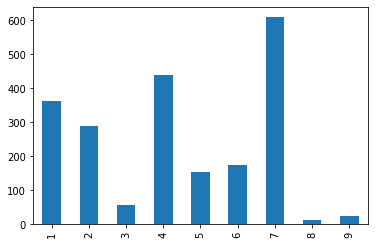

In [40]:
train_df['Class'].value_counts().sort_index().plot(kind='bar')

### : Breaking the code for understanding ends

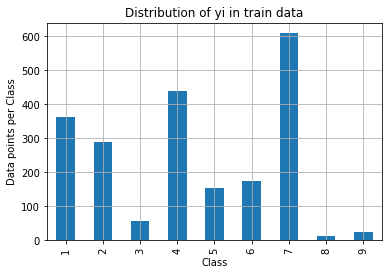

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)
--------------------------------------------------------------------------------


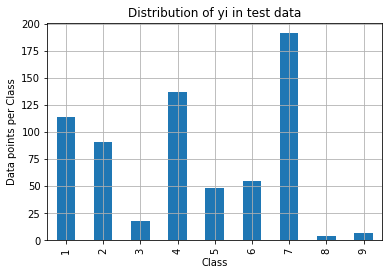

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


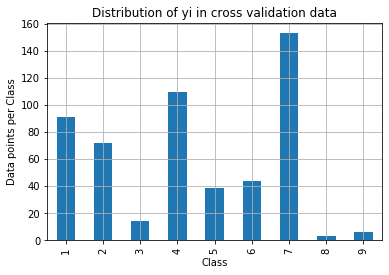

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [41]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.

# precision matrix = normalize the column sum to 1

# recall matrix = normalize the row sum to 1

# axis=0 corresonds to columns

# axis=1 corresponds to rows

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))  
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.4816018171617187
Log loss on Test Data using Random Model 2.4364638205376834
-------------------- Confusion matrix --------------------


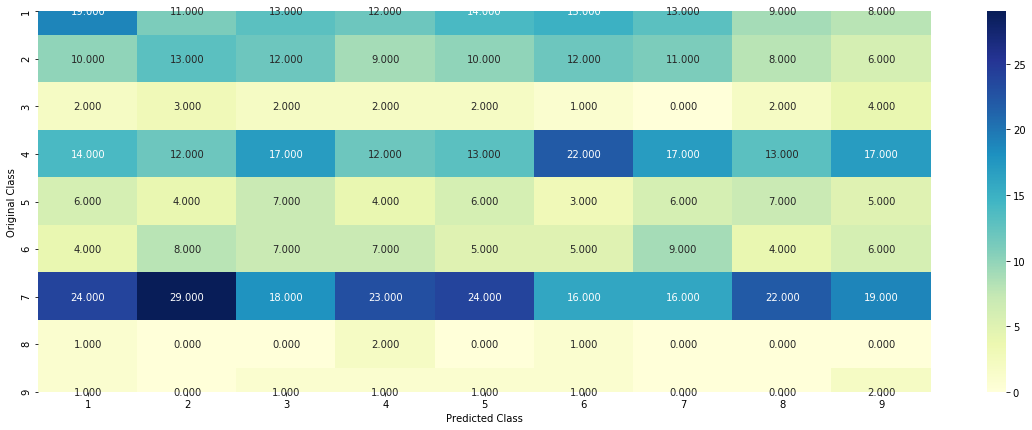

-------------------- Precision matrix (Columm Sum=1) --------------------


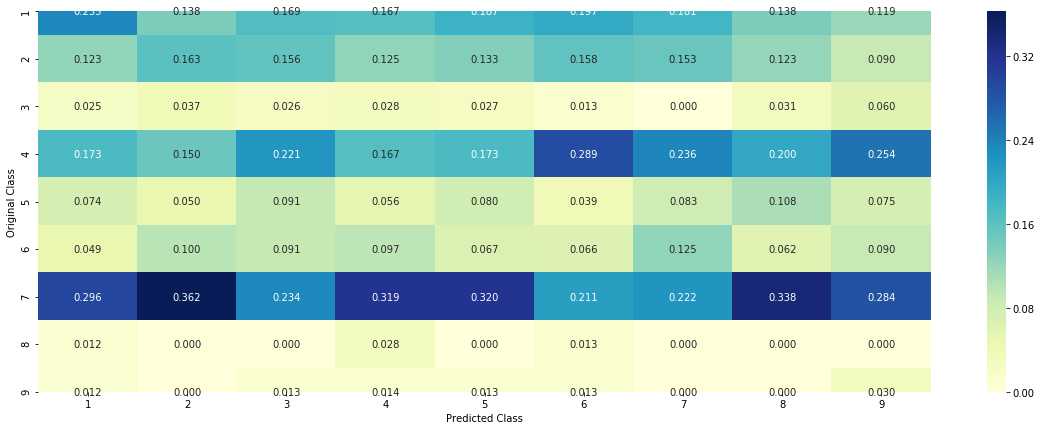

-------------------- Recall matrix (Row sum=1) --------------------


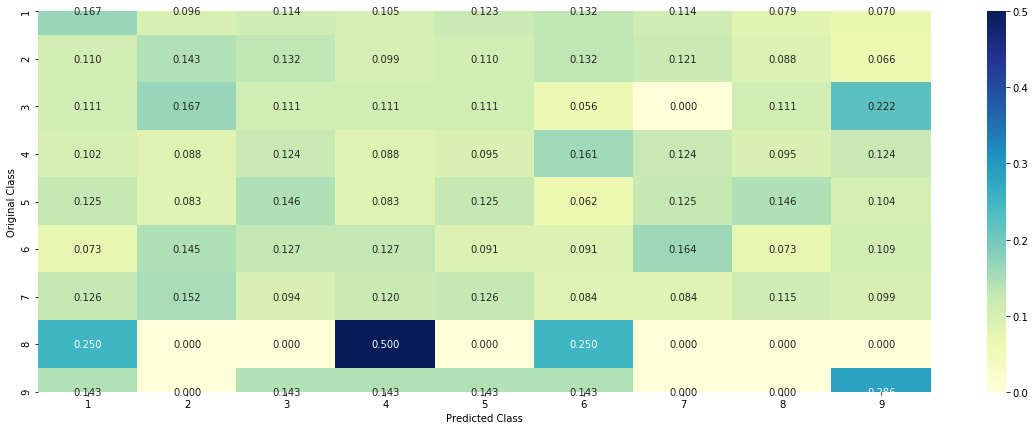

In [43]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h2>3.3 Univariate Analysis</h2>

In [44]:
print(result.shape)
print(train_df.shape)
print(test_df.shape)
print(cv_df.shape)
result.head(2)

(3321, 5)
(2124, 5)
(665, 5)
(532, 5)


,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating_Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...


In [0]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [46]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 229
BRCA1     172
TP53      108
EGFR       93
BRCA2      81
PTEN       79
KIT        66
BRAF       55
ERBB2      47
ALK        46
PDGFRA     40
Name: Gene, dtype: int64


In [47]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 229 different categories of genes in the train data, and they are distibuted as follows


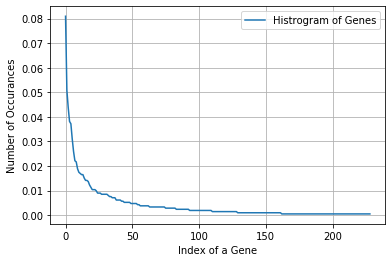

In [48]:
# Histogram of genes

s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()


# The distribution is right skwed

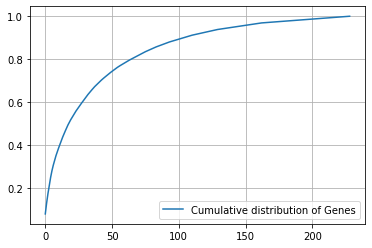

In [49]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [0]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [51]:
print(type(train_gene_feature_responseCoding))
print(train_gene_feature_responseCoding.shape)

<class 'numpy.ndarray'>
(2124, 9)


In [52]:
train_gene_feature_responseCoding

array([[0.06010929, 0.21311475, 0.05464481, ..., 0.36612022, 0.06010929,
        0.05464481],
       [0.17475728, 0.09708738, 0.09708738, ..., 0.09708738, 0.09708738,
        0.09708738],
       [0.17938931, 0.03816794, 0.08015267, ..., 0.03816794, 0.03816794,
        0.03816794],
       ...,
       [0.13450292, 0.05847953, 0.05847953, ..., 0.05847953, 0.05847953,
        0.05847953],
       [0.11340206, 0.11340206, 0.10309278, ..., 0.15463918, 0.10309278,
        0.10309278],
       [0.10416667, 0.10416667, 0.10416667, ..., 0.125     , 0.10416667,
        0.14583333]])

In [53]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [0]:
# Tfidf vectorizer of Gene feature.
"""max_features: To consider only the top max_features ordered by term frequency across the corpus. 
This is useful if you have strict limit on the size of TF-IDF transformed feature"""
gene_vectorizer = TfidfVectorizer(ngram_range=(1,1),max_features = 1000)  
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [55]:
train_df['Gene'].head()

231      EGFR
544     SMAD2
2641    BRCA1
731     ERBB2
217      EGFR
Name: Gene, dtype: object

In [56]:
gene_vectorizer.get_feature_names()

['abl1',
 'acvr1',
 'ago2',
 'akt1',
 'akt2',
 'akt3',
 'alk',
 'apc',
 'ar',
 'araf',
 'arid1a',
 'arid1b',
 'arid2',
 'arid5b',
 'asxl2',
 'atm',
 'atrx',
 'aurka',
 'aurkb',
 'axin1',
 'axl',
 'b2m',
 'bap1',
 'bcl10',
 'bcl2',
 'bcl2l11',
 'bcor',
 'braf',
 'brca1',
 'brca2',
 'brd4',
 'brip1',
 'btk',
 'card11',
 'carm1',
 'casp8',
 'cbl',
 'ccnd1',
 'ccnd3',
 'ccne1',
 'cdh1',
 'cdk12',
 'cdk4',
 'cdk8',
 'cdkn1a',
 'cdkn1b',
 'cdkn2a',
 'cdkn2b',
 'cdkn2c',
 'cebpa',
 'chek2',
 'cic',
 'crebbp',
 'ctcf',
 'ctnnb1',
 'ddr2',
 'dicer1',
 'dnmt3a',
 'dnmt3b',
 'egfr',
 'eif1ax',
 'elf3',
 'ep300',
 'epas1',
 'epcam',
 'erbb2',
 'erbb3',
 'erbb4',
 'ercc2',
 'ercc3',
 'ercc4',
 'erg',
 'errfi1',
 'esr1',
 'etv1',
 'etv6',
 'ewsr1',
 'ezh2',
 'fam58a',
 'fanca',
 'fancc',
 'fat1',
 'fbxw7',
 'fgf3',
 'fgf4',
 'fgfr1',
 'fgfr2',
 'fgfr3',
 'flt1',
 'flt3',
 'foxa1',
 'foxl2',
 'foxp1',
 'gata3',
 'gli1',
 'gnas',
 'h3f3a',
 'hist1h1c',
 'hla',
 'hnf1a',
 'hras',
 'idh1',
 'idh2',
 'ig

In [57]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 228)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.2618462018390217
For values of alpha =  0.0001 The log loss is: 1.2321074109556673
For values of alpha =  0.001 The log loss is: 1.2693901381012125
For values of alpha =  0.01 The log loss is: 1.398457370896306
For values of alpha =  0.1 The log loss is: 1.5244070213757206
For values of alpha =  1 The log loss is: 1.5665646158730304


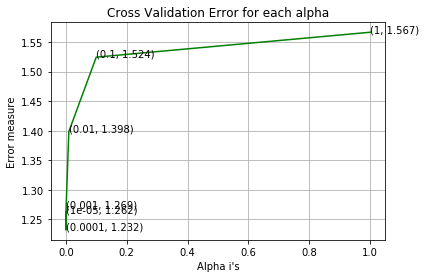

For values of best alpha =  0.0001 The train log loss is: 1.0122745694335336
For values of best alpha =  0.0001 The cross validation log loss is: 1.2321074109556673
For values of best alpha =  0.0001 The test log loss is: 1.1812256447596488


In [58]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [59]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  229  genes in train dataset?
Ans
1. In test data 639 out of 665 : 96.09022556390977
2. In cross validation data 516 out of  532 : 96.99248120300751


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [60]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1927
Truncating_Mutations    67
Deletion                44
Amplification           41
Fusions                 20
Overexpression           4
G12V                     4
Q61R                     3
Q61L                     3
T167A                    2
G13D                     2
Name: Variation, dtype: int64


In [61]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1927 different categories of variations in the train data, and they are distibuted as follows


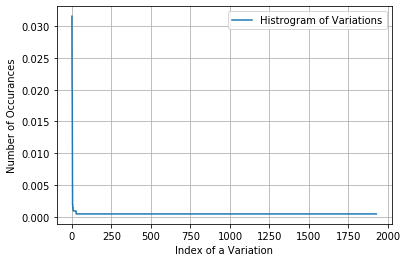

In [62]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.03154426 0.05225989 0.07156309 ... 0.99905838 0.99952919 1.        ]


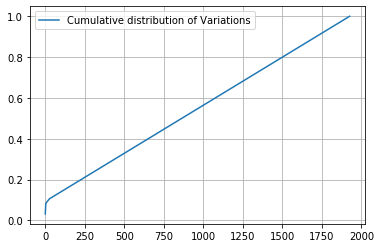

In [63]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [0]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [65]:
print(train_variation_feature_responseCoding.shape)

(2124, 9)


In [66]:
train_df.head(24)

,ID,Gene,Variation,Class,TEXT
231,231,EGFR,E746_A750delinsQ,7,non small cell lung cancer leading cause death...
544,544,SMAD2,S276L,1,activation canonical tgf signaling pathway pro...
2641,2641,BRCA1,E1644G,5,germ line inactivating mutations brca1 confer ...
731,731,ERBB2,N319D,5,assessed somatic alleles six receptor tyrosine...
217,217,EGFR,K745M,4,signal transduction pathways tightly controlle...
3057,3057,KIT,V559A,2,purpose gastrointestinal stromal tumors gist c...
1116,1116,FANCA,L210R,4,abstract fanconi anemia fa genomic instability...
2951,2951,BCL10,Truncating_Mutations,1,mucosa associated lymphoid tissue malt lymphom...
3005,3005,KIT,D816V,7,introduction mastocytosis comprises spectrum d...
2498,2498,BRCA1,R496C,5,significant proportion inherited breast cancer...


In [67]:
# THE PROBABILTY OF OCCURANCE OF THE RESPECTIVE CLASSES GIVEN THE CURRENT VARIATION
train_variation_feature_responseCoding[13]

# AS YOU SEE BOTH 13 AND 23 ARE SAME (SINCE, BOTH THE VARTATIONS ARE 'DELETION') (see, above head)

array([0.10989011, 0.10989011, 0.10989011, 0.10989011, 0.10989011,
       0.10989011, 0.12087912, 0.10989011, 0.10989011])

In [68]:
train_variation_feature_responseCoding[23]

array([0.10989011, 0.10989011, 0.10989011, 0.10989011, 0.10989011,
       0.10989011, 0.12087912, 0.10989011, 0.10989011])

In [69]:
train_variation_feature_responseCoding

array([[0.10989011, 0.10989011, 0.10989011, ..., 0.12087912, 0.10989011,
        0.10989011],
       [0.12087912, 0.10989011, 0.10989011, ..., 0.10989011, 0.10989011,
        0.10989011],
       [0.10989011, 0.10989011, 0.10989011, ..., 0.10989011, 0.10989011,
        0.10989011],
       ...,
       [0.10989011, 0.10989011, 0.10989011, ..., 0.10989011, 0.10989011,
        0.10989011],
       [0.07633588, 0.16793893, 0.07633588, ..., 0.2519084 , 0.07633588,
        0.07633588],
       [0.07633588, 0.16793893, 0.07633588, ..., 0.2519084 , 0.07633588,
        0.07633588]])

In [70]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [0]:
# Tfidf vectorizer of variation feature.
"""max_features: To consider only the top max_features ordered by term frequency across the corpus. 
This is useful if you have strict limit on the size of TF-IDF transformed feature"""
variation_vectorizer = TfidfVectorizer(ngram_range=(1,1),max_features = 1000)
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [72]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1000)


In [73]:
variation_vectorizer.get_feature_names()

['17',
 '1_fusion',
 'a146t',
 'alk_fusion',
 'amplification',
 'bcor',
 'bcr',
 'braf_fusion',
 'c618r',
 'ccdc6_fusion',
 'cep85l',
 'deletion',
 'e1552del',
 'e157g',
 'e1586g',
 'e160',
 'e1644g',
 'e17k',
 'egfr',
 'erg_fusion',
 'etv1_fusion',
 'etv4_fusion',
 'etv6',
 'ewsr1',
 'ezr',
 'f384l',
 'fgfr1_fusion',
 'fgfr2',
 'fusions',
 'g12d',
 'g12v',
 'g13c',
 'g13d',
 'g13v',
 'g35r',
 'i31m',
 'igh',
 'jak2_fusion',
 'k117n',
 'kif5b',
 'l858r',
 'm1255i',
 'm134l',
 'm1400v',
 'm1411t',
 'm1628v',
 'm1652k',
 'm1652t',
 'm1775v',
 'm1783i',
 'm1783t',
 'm18k',
 'm18t',
 'm199del',
 'm1k',
 'm1r',
 'm1t',
 'm224r',
 'm237k',
 'm244v',
 'm2676t',
 'm269r',
 'm351t',
 'm35r',
 'm374v',
 'm37k',
 'm391r',
 'm535i',
 'm53i',
 'm541l',
 'm552_k558del',
 'm552_w557del',
 'm587v',
 'm664i',
 'm713i',
 'm737i',
 'm774_a775insayvm',
 'm784v',
 'm887i',
 'm90i',
 'm918v',
 'm980t',
 'met_fusion',
 'mgea5_fusion',
 'mir143',
 'mll',
 'moz_fusion',
 'mprip',
 'myc',
 'myc_fusion',
 'n1026

<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.7401508843499254
For values of alpha =  0.0001 The log loss is: 1.7353905420131666
For values of alpha =  0.001 The log loss is: 1.7382522486975562
For values of alpha =  0.01 The log loss is: 1.7511100128882393
For values of alpha =  0.1 The log loss is: 1.7637572197464695
For values of alpha =  1 The log loss is: 1.7640839343229118


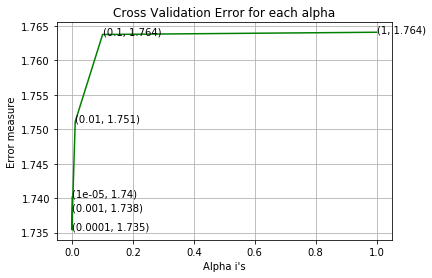

For values of best alpha =  0.0001 The train log loss is: 1.1764526484108422
For values of best alpha =  0.0001 The cross validation log loss is: 1.7353905420131666
For values of best alpha =  0.0001 The test log loss is: 1.6852517443429471


In [74]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [75]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1927  genes in test and cross validation data sets?
Ans
1. In test data 75 out of 665 : 11.278195488721805
2. In cross validation data 49 out of  532 : 9.210526315789473


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [0]:
# cls_text is a data frame
# for every row in data frame consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

# this basically makes maintais the dict of each words with their count

def extract_dictionary_paddle(cls_text): # here we are passing the total text column of the entire train dataset
    dictionary = defaultdict(int) # forming the default dict, when key is not there, it wont cause any error, it will return Zero
    for index, row in cls_text.iterrows(): # pickig the index and row
        for word in row['TEXT'].split(): # picking the text column of the each row and then getting the each word.
            dictionary[word] +=1
    return dictionary

### Breaking the code for understanding

In [112]:
"""
print(type(dict_list)) # this dict list contains multiple dictionary
print(type(total_dict)) # will contains all the words in the train data and their freq count as value"""

<class 'list'>
<class 'collections.defaultdict'>


In [113]:
"""# here dict_list contains the list of dictionaries
print(type(dict_list[0]))
print(type(dict_list[1]))
print(type(dict_list[2]))
print(type(dict_list[3]))"""

<class 'collections.defaultdict'>
<class 'collections.defaultdict'>
<class 'collections.defaultdict'>
<class 'collections.defaultdict'>


In [114]:
#total_dict.get("becomes") # here 531 times the word becomes occurs in the train dataframe

506

In [115]:
#dict_list[0].get("becomes") # here the word becomes occurs in the train dataframe where the output label is class 0

73

In [116]:
"""# for cross verification lets add all of the "becomes" in the list of dictionary
countt = 0
for x in range(len(dict_list)):
  countt += dict_list[x].get("becomes")
print(countt)
"""

506


In [117]:
#total_dict.get("becomes",0)

506

### Breaking the code for understanding ends

In [0]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9)) # creating the numpy array of (shape Number of rows X 9) (9 is class labels)
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90))) # log( (# times the word appears for class[0]) / (# times the word appears for all the class) )
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split())) # for each rows, it will fill Class_0 first (the class for loop is at top)
            row_index += 1
    return text_feature_responseCoding

In [109]:
print(type(train_text_features))
print(len(train_text_features)) # all the unique words in the train dataframe text column
print(type(train_text_fea_counts))
print(len(train_text_fea_counts))
print("The word %s" % train_text_features[0])
print("The number of ocurance of the word %s " % train_text_fea_counts[0])

<class 'list'>
1000
<class 'numpy.ndarray'>
1000
The word 000
The number of ocurance of the word 14.053548982499183 


In [108]:
# to cross verify the above Stmt:

total_dict.get("00") # seems same as train_text_fea_counts[0]

2312

### My understanding ends

In [107]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = TfidfVectorizer(ngram_range=(1,1),min_df=2,max_features =1000)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts)) # same kind of mapping as total_dict


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 1000


In [106]:
"""
print(type(text_fea_dict))
print(len(text_fea_dict))
print(type(total_dict))
print(len(total_dict))

# the count mistaching, because we are using min_df = 3 in CountVectorizerS
"""

<class 'dict'>
1000
<class 'collections.defaultdict'>
125767


In [0]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i] # gives the dataframe where class = 0,1, etc...
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features: # train_text_features will have all the words in train data
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [0]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

### My understanding starts

In [95]:
"""
print(type(train_text_feature_responseCoding))
print(train_text_feature_responseCoding.shape)
print(train_text_feature_responseCoding[0]) # this gives, if a particular word exist, what is the probability for occurance of each class
print(train_text_feature_responseCoding[0].sum())
"""

<class 'numpy.ndarray'>
(2124, 9)
[0.1186832  0.14803114 0.01577212 0.11941844 0.04021262 0.05100039
 0.38577529 0.0077172  0.01223294]
0.8988433267888322


In [96]:
"""
# Simple POC for axis

w = np.array([
    [1,2,3],
    [4,5,6]
])

print(w.shape)
#print("Shape of w: %s" % w.shape)
print("Column sum: %s" % w.sum(axis=0) )
print("Row sum: %s" % w.sum(axis=1))
print("*"*140)
print(w.T)
print("*"*140)
print((w.T/w.sum(axis=1)))
print("*"*140)
print((w.T/w.sum(axis=1)).T)
print("*"*140)
#print(w/w.sum(axis=1)) # ERROR: operands could not be broadcast together with shapes (2,3) (2,) 
"""

(2, 3)
Column sum: [5 7 9]
Row sum: [ 6 15]
********************************************************************************************************************************************
[[1 4]
 [2 5]
 [3 6]]
********************************************************************************************************************************************
[[0.16666667 0.26666667]
 [0.33333333 0.33333333]
 [0.5        0.4       ]]
********************************************************************************************************************************************
[[0.16666667 0.33333333 0.5       ]
 [0.26666667 0.33333333 0.4       ]]
********************************************************************************************************************************************


### My understanding ends

In [0]:
# https://stackoverflow.com/a/16202486
# axis = 1 : Rows 
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [98]:
# after the above step:

print(type(train_text_feature_responseCoding))
print(len(train_text_feature_responseCoding))
print(train_text_feature_responseCoding[0].sum())

<class 'numpy.ndarray'>
2124
1.0


In [0]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [0]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

### My understanding starts

In [101]:
text_fea_dict.items()

dict_items([('000', 14.053548982499183), ('001', 8.728313522567648), ('01', 9.487898786737553), ('05', 9.1883628549512), ('10', 56.88387756389704), ('100', 21.402776572615984), ('11', 29.757592787606608), ('12', 31.183149765605243), ('13', 24.744463270395876), ('14', 26.72724690229619), ('15', 29.202677293405742), ('16', 22.113488563779427), ('17', 21.325759659403673), ('18', 23.011497082957963), ('19', 19.781631637290307), ('1996', 9.31248238682087), ('1997', 10.752867926713503), ('1998', 10.00018615804094), ('1999', 8.489434920386685), ('1a', 9.872280747978646), ('1b', 8.959719252862902), ('20', 31.725455010528165), ('200', 7.912970484614375), ('2000', 8.768320899139107), ('2001', 9.441098950181898), ('2002', 8.900445528182413), ('2003', 9.325770777469579), ('2004', 11.566316140476657), ('2005', 10.978443051986076), ('2006', 13.637139689364487), ('2007', 11.36097679481434), ('2008', 12.000744748305943), ('2009', 12.134714774117672), ('2010', 14.768030549244644), ('2011', 15.802712355

In [102]:
sorted_text_fea_dict # Sorted dict based on the values, higher the occurance of the word will be first in the list

{'mutations': 253.9791031836221,
 'cells': 176.40891530814886,
 'brca1': 137.9709161187524,
 'fig': 131.3754077930344,
 'cell': 126.51921030083399,
 'al': 116.9024254356497,
 'mutation': 116.62482595291434,
 'et': 116.48781406993034,
 'figure': 108.79010152426879,
 'cancer': 105.88009546993867,
 'variants': 101.62869883663444,
 'patients': 89.12666085173711,
 'p53': 87.16154823495272,
 'protein': 86.15324787058667,
 'mutant': 82.78439765935364,
 'egfr': 81.57262734972237,
 'expression': 78.8826492822191,
 'pten': 78.66769804858033,
 'activity': 78.53867286803992,
 'tumor': 77.66056814823779,
 'type': 74.74644088479742,
 'kinase': 74.19275535721066,
 'domain': 69.00264901864675,
 'gene': 68.76529209855619,
 'tumors': 68.09019927808562,
 'using': 67.72134171402,
 'dna': 66.69889623094556,
 'mutants': 65.02826403520969,
 'analysis': 63.131586599857734,
 'also': 63.092346992392045,
 'wild': 62.720878789077254,
 'binding': 62.698240431273945,
 'data': 62.20263861379689,
 'supplementary': 60

In [103]:
sorted_text_fea_dict.values()

dict_values([253.9791031836221, 176.40891530814886, 137.9709161187524, 131.3754077930344, 126.51921030083399, 116.9024254356497, 116.62482595291434, 116.48781406993034, 108.79010152426879, 105.88009546993867, 101.62869883663444, 89.12666085173711, 87.16154823495272, 86.15324787058667, 82.78439765935364, 81.57262734972237, 78.8826492822191, 78.66769804858033, 78.53867286803992, 77.66056814823779, 74.74644088479742, 74.19275535721066, 69.00264901864675, 68.76529209855619, 68.09019927808562, 67.72134171402, 66.69889623094556, 65.02826403520969, 63.131586599857734, 63.092346992392045, 62.720878789077254, 62.698240431273945, 62.20263861379689, 60.438085930592784, 59.682592325452674, 56.88387756389704, 56.06226623451063, 55.917291441246654, 55.32308713817971, 51.64715624098133, 51.43344498441532, 50.972174502535054, 49.60567937450408, 49.18048583893072, 48.71912563760274, 48.260840593052656, 45.734073811443956, 45.30990868606356, 44.8965439052906, 44.50626539879986, 43.888281741988315, 43.54

In [104]:
sorted_text_occur

array([253.97910318, 176.40891531, 137.97091612, 131.37540779,
       126.5192103 , 116.90242544, 116.62482595, 116.48781407,
       108.79010152, 105.88009547, 101.62869884,  89.12666085,
        87.16154823,  86.15324787,  82.78439766,  81.57262735,
        78.88264928,  78.66769805,  78.53867287,  77.66056815,
        74.74644088,  74.19275536,  69.00264902,  68.7652921 ,
        68.09019928,  67.72134171,  66.69889623,  65.02826404,
        63.1315866 ,  63.09234699,  62.72087879,  62.69824043,
        62.20263861,  60.43808593,  59.68259233,  56.88387756,
        56.06226623,  55.91729144,  55.32308714,  51.64715624,
        51.43344498,  50.9721745 ,  49.60567937,  49.18048584,
        48.71912564,  48.26084059,  45.73407381,  45.30990869,
        44.89654391,  44.5062654 ,  43.88828174,  43.5437993 ,
        43.51705619,  43.14946256,  43.12075314,  42.36333044,
        42.23175788,  41.44147062,  41.43493479,  41.42646471,
        41.39760728,  41.25795046,  41.23985311,  40.04

### My understanding ends

In [105]:
sorted_text_occur

array([253.97910318, 176.40891531, 137.97091612, 131.37540779,
       126.5192103 , 116.90242544, 116.62482595, 116.48781407,
       108.79010152, 105.88009547, 101.62869884,  89.12666085,
        87.16154823,  86.15324787,  82.78439766,  81.57262735,
        78.88264928,  78.66769805,  78.53867287,  77.66056815,
        74.74644088,  74.19275536,  69.00264902,  68.7652921 ,
        68.09019928,  67.72134171,  66.69889623,  65.02826404,
        63.1315866 ,  63.09234699,  62.72087879,  62.69824043,
        62.20263861,  60.43808593,  59.68259233,  56.88387756,
        56.06226623,  55.91729144,  55.32308714,  51.64715624,
        51.43344498,  50.9721745 ,  49.60567937,  49.18048584,
        48.71912564,  48.26084059,  45.73407381,  45.30990869,
        44.89654391,  44.5062654 ,  43.88828174,  43.5437993 ,
        43.51705619,  43.14946256,  43.12075314,  42.36333044,
        42.23175788,  41.44147062,  41.43493479,  41.42646471,
        41.39760728,  41.25795046,  41.23985311,  40.04

In [118]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({253.9791031836221: 1, 176.40891530814886: 1, 137.9709161187524: 1, 131.3754077930344: 1, 126.51921030083399: 1, 116.9024254356497: 1, 116.62482595291434: 1, 116.48781406993034: 1, 108.79010152426879: 1, 105.88009546993867: 1, 101.62869883663444: 1, 89.12666085173711: 1, 87.16154823495272: 1, 86.15324787058667: 1, 82.78439765935364: 1, 81.57262734972237: 1, 78.8826492822191: 1, 78.66769804858033: 1, 78.53867286803992: 1, 77.66056814823779: 1, 74.74644088479742: 1, 74.19275535721066: 1, 69.00264901864675: 1, 68.76529209855619: 1, 68.09019927808562: 1, 67.72134171402: 1, 66.69889623094556: 1, 65.02826403520969: 1, 63.131586599857734: 1, 63.092346992392045: 1, 62.720878789077254: 1, 62.698240431273945: 1, 62.20263861379689: 1, 60.438085930592784: 1, 59.682592325452674: 1, 56.88387756389704: 1, 56.06226623451063: 1, 55.917291441246654: 1, 55.32308713817971: 1, 51.64715624098133: 1, 51.43344498441532: 1, 50.972174502535054: 1, 49.60567937450408: 1, 49.18048583893072: 1, 48.719125637

For values of alpha =  1e-05 The log loss is: 1.2633440466952104
For values of alpha =  0.0001 The log loss is: 1.1673360732583928
For values of alpha =  0.001 The log loss is: 1.2421894179106876
For values of alpha =  0.01 The log loss is: 1.4556852823562034
For values of alpha =  0.1 The log loss is: 1.7394504326751623
For values of alpha =  1 The log loss is: 1.7943375705410027


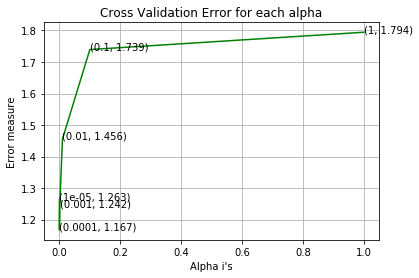

For values of best alpha =  0.0001 The train log loss is: 0.8549309792957898
For values of best alpha =  0.0001 The cross validation log loss is: 1.1673360732583928
For values of best alpha =  0.0001 The test log loss is: 1.1776838444448898


In [119]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

### For my understanding

In [120]:
df_text_vec = CountVectorizer(min_df=3)
df_text_fea = df_text_vec.fit_transform(train_df['TEXT'])
print(type(df_text_fea))
df_text_features = df_text_vec.get_feature_names()
df_text_fea_counts = df_text_fea.sum(axis=0).A1


<class 'scipy.sparse.csr.csr_matrix'>


In [121]:
# its BOW technique
df_text_fea

<2124x53245 sparse matrix of type '<class 'numpy.int64'>'
	with 3314310 stored elements in Compressed Sparse Row format>

In [122]:
print(df_text_fea)

  (0, 34711)	29
  (0, 45537)	34
  (0, 12173)	65
  (0, 30437)	80
  (0, 11317)	62
  (0, 29531)	3
  (0, 11783)	3
  (0, 15754)	3
  (0, 50551)	7
  (0, 46327)	7
  (0, 12622)	10
  (0, 45482)	1
  (0, 39649)	1
  (0, 47173)	37
  (0, 7352)	25
  (0, 37006)	194
  (0, 6565)	15
  (0, 16922)	31
  (0, 14303)	1
  (0, 13076)	9
  (0, 45219)	18
  (0, 6577)	5
  (0, 18395)	7
  (0, 46890)	1
  (0, 5995)	6
  :	:
  (2123, 25761)	1
  (2123, 46200)	1
  (2123, 40216)	1
  (2123, 36484)	1
  (2123, 39325)	1
  (2123, 46394)	1
  (2123, 33311)	1
  (2123, 177)	1
  (2123, 329)	1
  (2123, 9959)	1
  (2123, 1202)	1
  (2123, 29489)	1
  (2123, 18368)	10
  (2123, 25220)	1
  (2123, 53229)	1
  (2123, 27157)	2
  (2123, 9643)	2
  (2123, 11492)	1
  (2123, 48818)	3
  (2123, 37508)	1
  (2123, 49663)	4
  (2123, 7251)	1
  (2123, 8410)	2
  (2123, 26212)	1
  (2123, 9183)	1


In [123]:
df_text_fea.sum(axis=0)

matrix([[2312, 5612,   14, ...,    9,    5,   19]], dtype=int64)

In [124]:
print(df_text_features)
print(df_text_fea_counts)

['00', '000', '0000', '00000001', '0000001', '000001', '000002', '000007', '00001', '000011', '000012', '000017', '00002644', '000044', '00005', '000059', '00006', '000077', '00009', '0001', '000132', '000141', '000148', '000179', '000182', '00019', '0001a', '0002', '0002158', '000245', '000249', '00025', '000251', '000258', '000267', '00028', '00029', '0003', '00034', '000369266', '00037', '0004', '00047', '0005', '000535', '000546', '000548', '000588', '0006', '0007', '0008', '00088', '0009', '00092', '000g', '000xg', '001', '0010', '00103', '0011', '001105', '001172713', '0012', '001210', '001269551', '0012a', '0013', '0014', '001429', '0014b', '0015', '0016', '001635', '001654', '0017', '0018', '001810', '0019', '001a', '001acd4', '001acd8', '001bathe', '001bimmunophenotypecd34', '001blyl1', '002', '0021', '0022', '0023', '0024', '0025', '0025021', '0026', '002648', '0026a', '0027', '002755', '0028', '002880', '00299804', '002a', '003', '0030', '003008', '0030485', '0031', '003133'

### For my understanding ends

In [0]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [126]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

3.436 % of word of test data appeared in train data
3.796 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models</h1>

In [0]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid") # calibrated classifier to calculate the Exact probabilty of the target class
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [0]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [0]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = TfidfVectorizer(ngram_range=(1,1),max_features = 1000)
    var_count_vec = TfidfVectorizer(ngram_range=(1,1),max_features = 1000)
    text_count_vec = TfidfVectorizer(ngram_range=(1,1),min_df=2,max_features =1000)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(tqdm(indices)):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [0]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [133]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 2228)
(number of data points * number of features) in test data =  (665, 2228)
(number of data points * number of features) in cross validation data = (532, 2228)


In [134]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

for alpha = 1e-05
Log Loss : 1.1896049669019073
for alpha = 0.0001
Log Loss : 1.189230511401085
for alpha = 0.001
Log Loss : 1.1893411304061974
for alpha = 0.1
Log Loss : 1.2098562918161981
for alpha = 1
Log Loss : 1.2692796681343885
for alpha = 10
Log Loss : 1.4542057067214955
for alpha = 100
Log Loss : 1.4602173084939536
for alpha = 1000
Log Loss : 1.4541640818208241


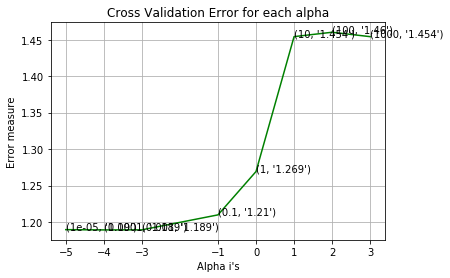

For values of best alpha =  0.0001 The train log loss is: 0.7273642883760506
For values of best alpha =  0.0001 The cross validation log loss is: 1.189230511401085
For values of best alpha =  0.0001 The test log loss is: 1.2372455867824834


In [171]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()



best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log Loss : 1.189230511401085
Number of missclassified point : 0.38533834586466165
-------------------- Confusion matrix --------------------


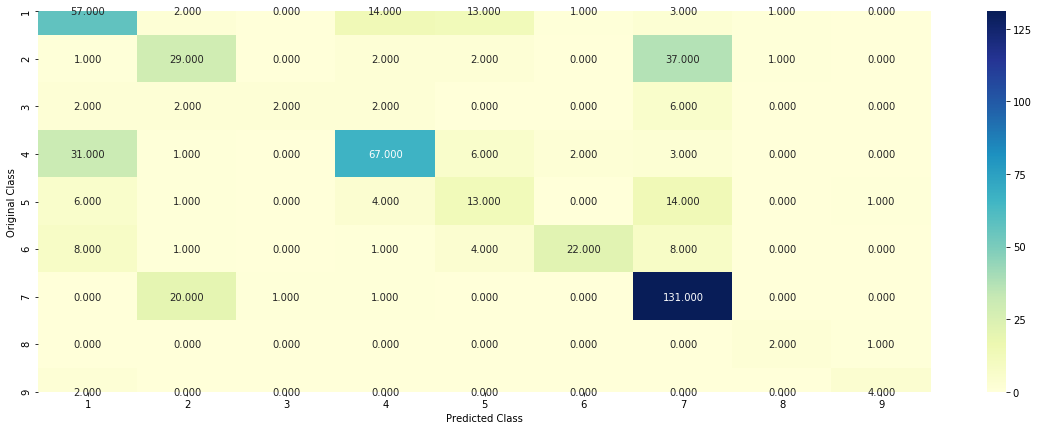

-------------------- Precision matrix (Columm Sum=1) --------------------


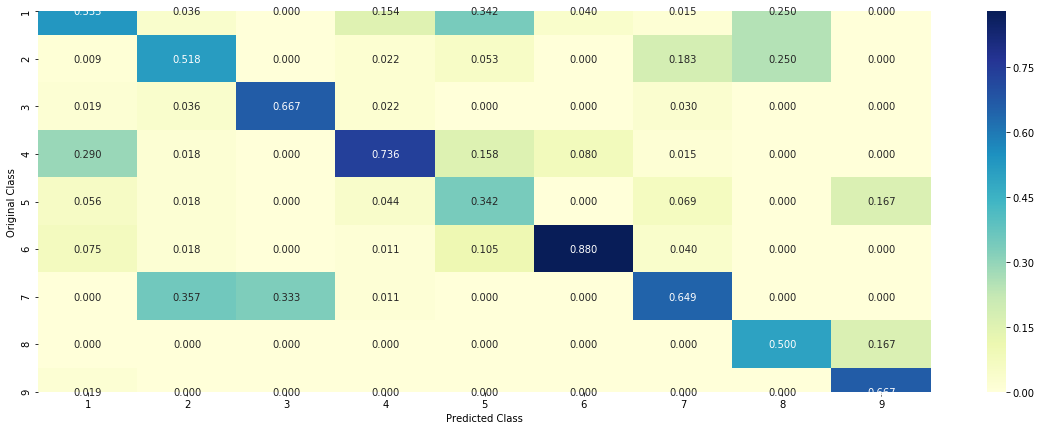

-------------------- Recall matrix (Row sum=1) --------------------


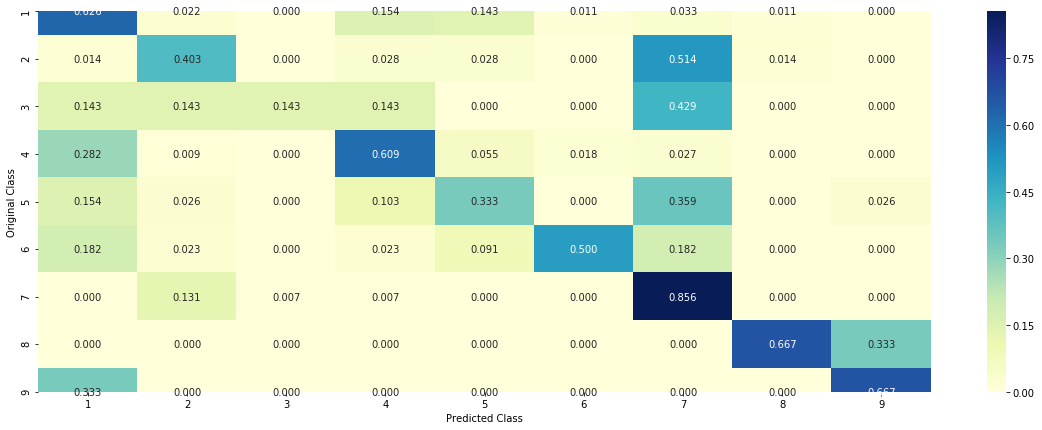

In [172]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [173]:
test_x_onehotCoding[2]

<1x2235 sparse matrix of type '<class 'numpy.float64'>'
	with 608 stored elements in Compressed Sparse Row format>

In [177]:
print(test_x_onehotCoding.shape)

(665, 2235)


### My understanding starts

In [176]:
# these are weight vector of the resultant model
print(type(clf.coef_))
print(clf.coef_.shape)

<class 'numpy.ndarray'>
(9, 2235)


In [182]:
-clf.coef_

array([[17.62512106, 17.62512106,  7.7215835 , ...,  7.18076115,
         7.26000105,  6.59295572],
       [ 5.17726928, 17.3320539 ,  8.12161353, ...,  7.11328666,
         9.41027339,  6.81375114],
       [15.49419884, 15.49419884, 15.49419884, ...,  8.34279651,
         7.34338362,  7.27894116],
       ...,
       [ 8.84075712,  8.14765994, 18.05119749, ...,  7.46023944,
         9.70210524,  6.88563143],
       [14.4032017 , 14.4032017 , 14.4032017 , ...,  7.54336869,
         6.93518631,  7.27382579],
       [15.04621951, 15.04621951, 15.04621951, ...,  8.94635166,
         9.68477227,  6.13779155]])

In [197]:
# argsort working
u = np.array([[1,3,2],
              [4,5,6]])
print(u)
print('*'*120)
uu = np.argsort(u) # giving the index of sorted array based on row
print(uu)
print('*'*120)
uuu = np.argsort(-u)
print(uuu)

[[1 3 2]
 [4 5 6]]
************************************************************************************************************************
[[0 2 1]
 [0 1 2]]
************************************************************************************************************************
[[1 2 0]
 [2 1 0]]


In [186]:
np.argsort(abs(-clf.coef_)).shape

(9, 2235)

In [193]:
predicted_cls

array([7])

In [194]:
no_feature

100

In [0]:
indices=np.argsort(abs(-clf.coef_))[predicted_cls-1][:,:no_feature] # here we are picking the specific weight vector
# as there are total ((9, 2235)), picking the corrseponding class and then picking the weight vectors of that class in incresing order
# np.argsort will gives the index in ascending order, with negative (-clf.coef_) it will give output in descending order

In [196]:
print(type(indices))
print(indices) # index of top 100 weight vector values

<class 'numpy.ndarray'>
[[  60  114  157   29    6  159  238   87  123  121   66  137   90  132
    54  144 1333 1331 1555 1751  191 1433 1729 1599 1668 1353 1485 1238
  1604 1715 2069    3 2221 2181 1686 1338 1853 1728 2064 1944 1477 2075
  2182 2050 1948 1462 1432 1292 1807 1926 1941 1629 1332 1679 1468 1981
  2228 1730 2170 1254 1890 2062 1611 1712 1848 1324 2140  109  108  147
  2130 1330 1478 1575 2023 2194 1727 1357 1291 1543 1244 1525 1241 1884
  1810 1536 2203 1589 2191 2017 1851 2121 2005 2120 1247 1910 1957 1569
  1476 1982]]


In [198]:
indices[0]

array([  60,  114,  157,   29,    6,  159,  238,   87,  123,  121,   66,
        137,   90,  132,   54,  144, 1333, 1331, 1555, 1751,  191, 1433,
       1729, 1599, 1668, 1353, 1485, 1238, 1604, 1715, 2069,    3, 2221,
       2181, 1686, 1338, 1853, 1728, 2064, 1944, 1477, 2075, 2182, 2050,
       1948, 1462, 1432, 1292, 1807, 1926, 1941, 1629, 1332, 1679, 1468,
       1981, 2228, 1730, 2170, 1254, 1890, 2062, 1611, 1712, 1848, 1324,
       2140,  109,  108,  147, 2130, 1330, 1478, 1575, 2023, 2194, 1727,
       1357, 1291, 1543, 1244, 1525, 1241, 1884, 1810, 1536, 2203, 1589,
       2191, 2017, 1851, 2121, 2005, 2120, 1247, 1910, 1957, 1569, 1476,
       1982])

### My understanding ends

In [199]:
test_point_index = 2
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices=np.argsort(abs(-clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0743 0.08   0.2169 0.078  0.0451 0.047  0.4474 0.0061 0.0052]]
Actual Class : 7
--------------------------------------------------
16 Text feature [activation] present in test data point [True]
17 Text feature [activated] present in test data point [True]
18 Text feature [downstream] present in test data point [True]
19 Text feature [kinase] present in test data point [True]
21 Text feature [cells] present in test data point [True]
22 Text feature [inhibitor] present in test data point [True]
23 Text feature [expressing] present in test data point [True]
24 Text feature [growth] present in test data point [True]
25 Text feature [also] present in test data point [True]
26 Text feature [contrast] present in test data point [True]
27 Text feature [10] present in test data point [True]
28 Text feature [factor] present in test data point [True]
30 Text feature [signaling] present in test data point [True]
32 Text feature [well] present 

<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [200]:
test_point_index = 102
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(abs(-clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.1465 0.0562 0.0132 0.1745 0.0342 0.036  0.5307 0.0046 0.0041]]
Actual Class : 4
--------------------------------------------------
16 Text feature [activation] present in test data point [True]
17 Text feature [activated] present in test data point [True]
19 Text feature [kinase] present in test data point [True]
21 Text feature [cells] present in test data point [True]
22 Text feature [inhibitor] present in test data point [True]
23 Text feature [expressing] present in test data point [True]
24 Text feature [growth] present in test data point [True]
25 Text feature [also] present in test data point [True]
26 Text feature [contrast] present in test data point [True]
27 Text feature [10] present in test data point [True]
28 Text feature [factor] present in test data point [True]
29 Text feature [independent] present in test data point [True]
32 Text feature [well] present in test data point [True]
34 Text feature [however] present i

<h2>4.2. K Nearest Neighbour Classification</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

for alpha = 5
Log Loss : 1.0112459513290761
for alpha = 11
Log Loss : 1.0550037897201698
for alpha = 15
Log Loss : 1.0738358288538863
for alpha = 21
Log Loss : 1.1140568421890487
for alpha = 31
Log Loss : 1.123182778981757
for alpha = 41
Log Loss : 1.1231351823123454
for alpha = 51
Log Loss : 1.1256439836584073
for alpha = 99
Log Loss : 1.1327054299067312


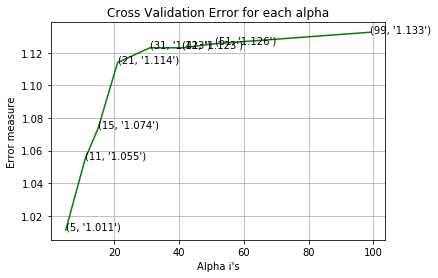

For values of best alpha =  5 The train log loss is: 0.4846176674211682
For values of best alpha =  5 The cross validation log loss is: 1.0112459513290761
For values of best alpha =  5 The test log loss is: 1.098458509918329


In [201]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>4.2.2. Testing the model with best hyper paramters</h3>

Log loss : 1.0112459513290761
Number of mis-classified points : 0.3233082706766917
-------------------- Confusion matrix --------------------


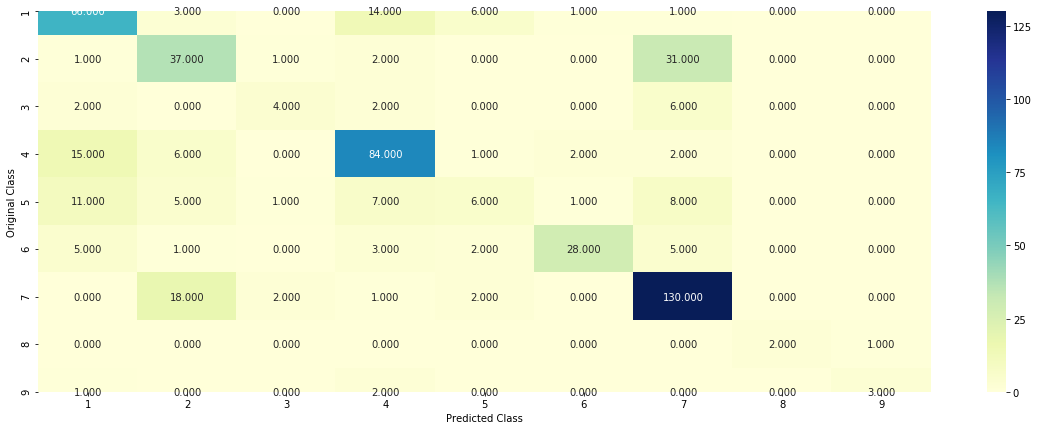

-------------------- Precision matrix (Columm Sum=1) --------------------


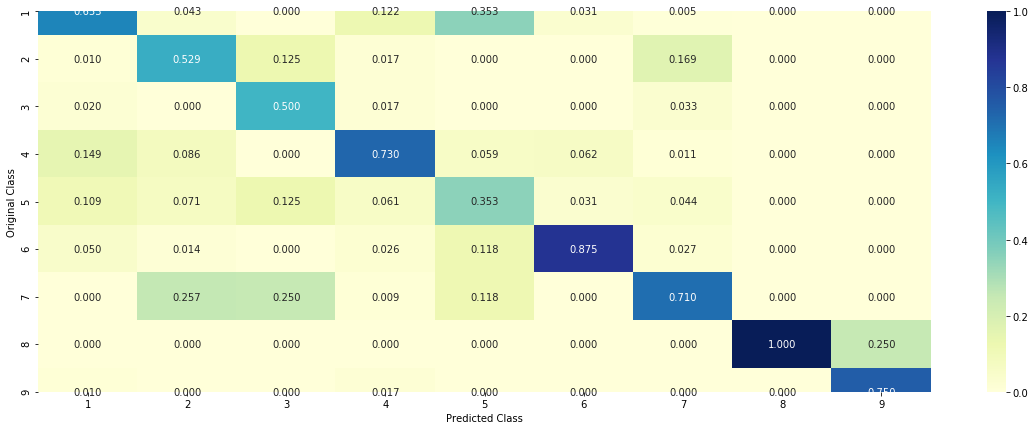

-------------------- Recall matrix (Row sum=1) --------------------


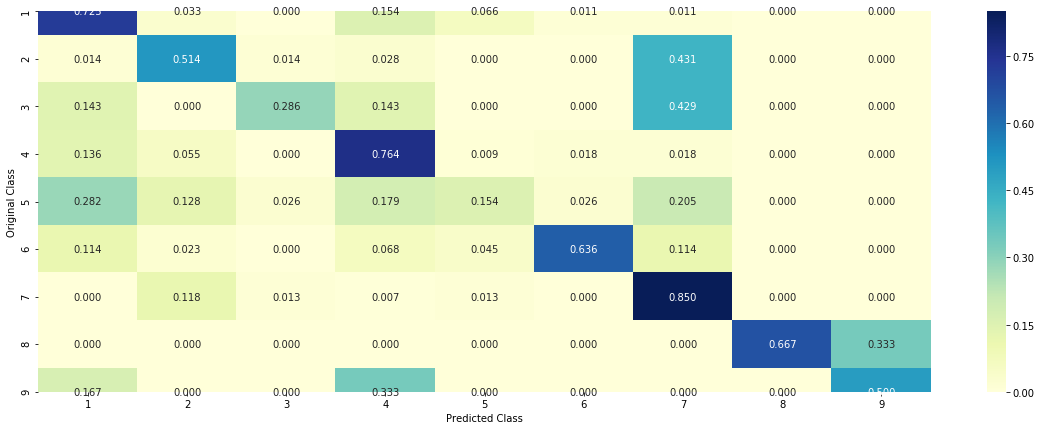

In [202]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [203]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 2
The  5  nearest neighbours of the test points belongs to classes [7 2 2 7 7]
Fequency of nearest points : Counter({7: 3, 2: 2})


<h3>4.2.4. Sample Query Point-2 </h3>

In [204]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 4
Actual Class : 4
the k value for knn is 5 and the nearest neighbours of the test points belongs to classes [4 4 4 3 4]
Fequency of nearest points : Counter({4: 4, 3: 1})


<h2>4.3. Logistic Regression</h2>

<h3>4.3.1. With Class balancing</h3>

<h4>4.3.1.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.228716077585954
for alpha = 1e-05
Log Loss : 1.0950728717730682
for alpha = 0.0001
Log Loss : 1.0426593869041245
for alpha = 0.001
Log Loss : 1.0912777569441656
for alpha = 0.01
Log Loss : 1.2792630398669456
for alpha = 0.1
Log Loss : 1.6469837397175882
for alpha = 1
Log Loss : 1.7545909111256264
for alpha = 10
Log Loss : 1.7675839968646216
for alpha = 100
Log Loss : 1.7691479701440762


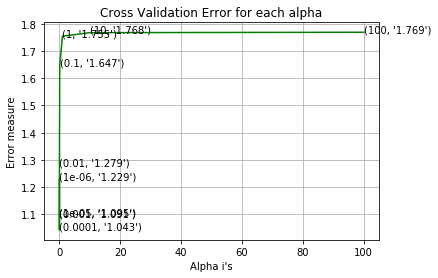

For values of best alpha =  0.0001 The train log loss is: 0.5605467439269347
For values of best alpha =  0.0001 The cross validation log loss is: 1.0426593869041245
For values of best alpha =  0.0001 The test log loss is: 1.030998287956868


In [205]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper paramters</h4>

Log loss : 1.0426593869041245
Number of mis-classified points : 0.3383458646616541
-------------------- Confusion matrix --------------------


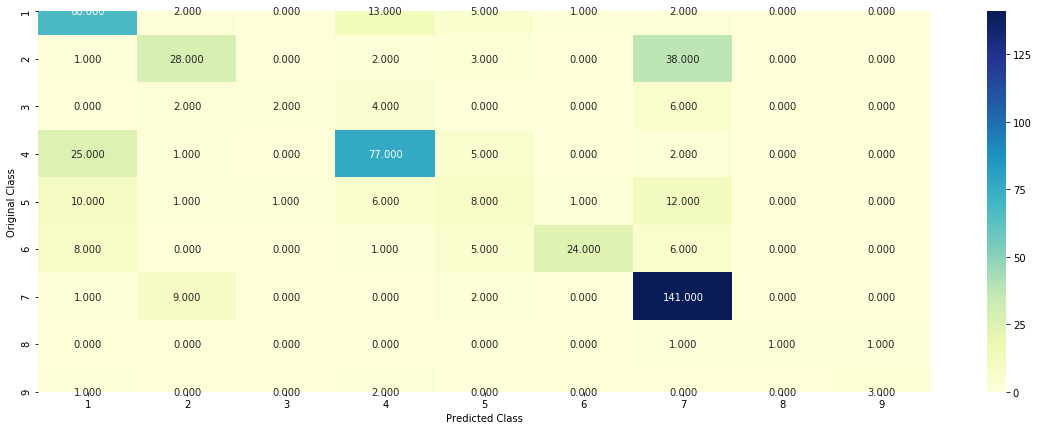

-------------------- Precision matrix (Columm Sum=1) --------------------


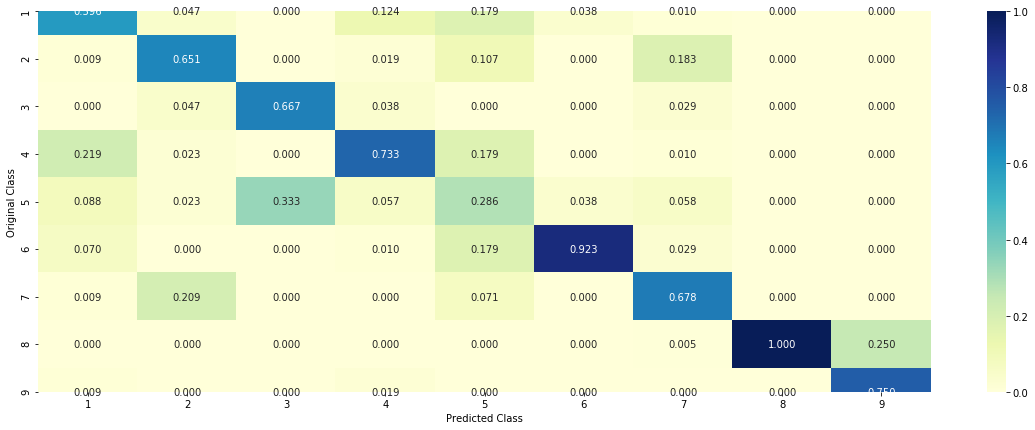

-------------------- Recall matrix (Row sum=1) --------------------


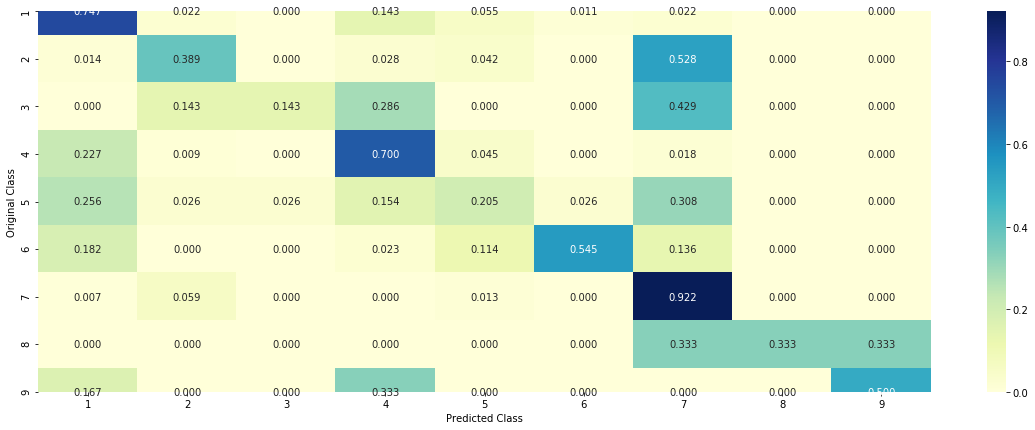

In [206]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [0]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [208]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 2
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(abs(-clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0099 0.0873 0.1015 0.012  0.0134 0.0062 0.7652 0.0035 0.0011]]
Actual Class : 7
--------------------------------------------------
1 Text feature [interact] present in test data point [True]
5 Text feature [general] present in test data point [True]
6 Text feature [loop] present in test data point [True]
7 Text feature [activity] present in test data point [True]
8 Text feature [structure] present in test data point [True]
24 Text feature [recent] present in test data point [True]
26 Text feature [analysis] present in test data point [True]
35 Text feature [three] present in test data point [True]
50 Text feature [pi3k] present in test data point [True]
52 Text feature [finding] present in test data point [True]
64 Text feature [13] present in test data point [True]
66 Text feature [associated] present in test data point [True]
72 Text feature [reported] present in test data point [True]
79 Text feature [report] present in test dat

<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [209]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(abs(-clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[1.490e-02 8.100e-03 4.820e-02 9.035e-01 1.410e-02 3.500e-03 3.500e-03
  3.300e-03 9.000e-04]]
Actual Class : 4
--------------------------------------------------
1 Text feature [three] present in test data point [True]
2 Text feature [result] present in test data point [True]
4 Text feature [frequently] present in test data point [True]
6 Text feature [figures] present in test data point [True]
9 Text feature [materials] present in test data point [True]
11 Text feature [likely] present in test data point [True]
12 Text feature [red] present in test data point [True]
13 Text feature [correlated] present in test data point [True]
15 Text feature [relevant] present in test data point [True]
17 Text feature [blot] present in test data point [True]
20 Text feature [applied] present in test data point [True]
26 Text feature [pocket] present in test data point [True]
35 Text feature [introduction] present in test data point [True]
36 Text 

<h3>4.3.2. Without Class balancing</h3>

<h4>4.3.2.1. Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 1.255295289324735
for alpha = 1e-05
Log Loss : 1.1480252730073532
for alpha = 0.0001
Log Loss : 1.0806562133611448
for alpha = 0.001
Log Loss : 1.182636698771701
for alpha = 0.01
Log Loss : 1.4649955733894542
for alpha = 0.1
Log Loss : 1.6969961890657483
for alpha = 1
Log Loss : 1.7640975218068495


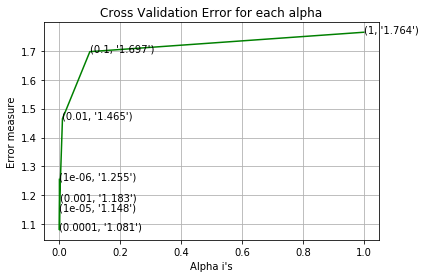

For values of best alpha =  0.0001 The train log loss is: 0.5609235752563231
For values of best alpha =  0.0001 The cross validation log loss is: 1.0806562133611448
For values of best alpha =  0.0001 The test log loss is: 1.0524506162517469


In [210]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 1.0806562133611448
Number of mis-classified points : 0.34022556390977443
-------------------- Confusion matrix --------------------


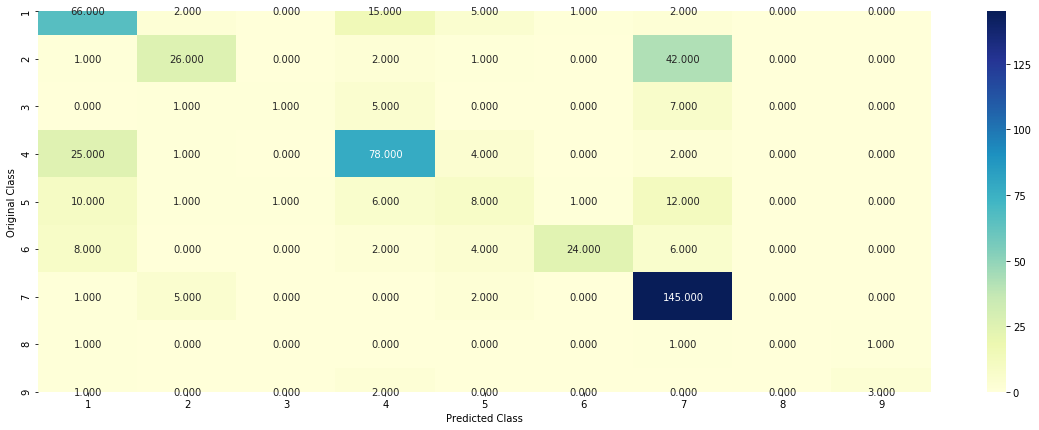

-------------------- Precision matrix (Columm Sum=1) --------------------


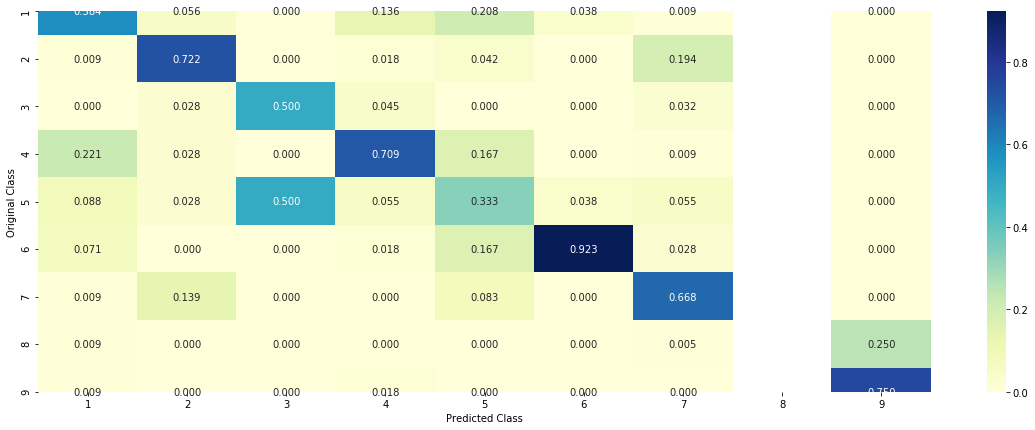

-------------------- Recall matrix (Row sum=1) --------------------


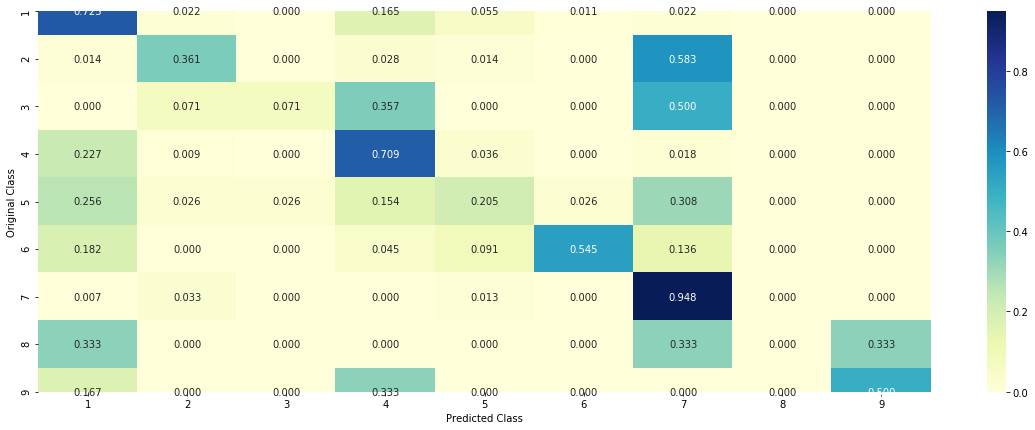

In [211]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [212]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 2
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(abs(-clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[9.80e-03 9.06e-02 6.85e-02 1.16e-02 1.10e-02 5.60e-03 7.98e-01 4.40e-03
  5.00e-04]]
Actual Class : 7
--------------------------------------------------
1 Text feature [activities] present in test data point [True]
2 Text feature [hypothesis] present in test data point [True]
7 Text feature [plasmid] present in test data point [True]
20 Text feature [table] present in test data point [True]
40 Text feature [associated] present in test data point [True]
44 Text feature [treatment] present in test data point [True]
47 Text feature [sporadic] present in test data point [True]
95 Text feature [10] present in test data point [True]
102 Text feature [low] present in test data point [True]
117 Text feature [recent] present in test data point [True]
121 Text feature [rate] present in test data point [True]
138 Text feature [interaction] present in test data point [True]
164 Text feature [19] present in test data point [True]
173 Text feature

<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [213]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(abs(-clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[1.900e-02 8.800e-03 1.430e-02 9.322e-01 1.380e-02 3.600e-03 4.100e-03
  3.700e-03 5.000e-04]]
Actual Class : 4
--------------------------------------------------
1 Text feature [cell] present in test data point [True]
3 Text feature [multiple] present in test data point [True]
5 Text feature [performed] present in test data point [True]
13 Text feature [applied] present in test data point [True]
16 Text feature [clear] present in test data point [True]
19 Text feature [seen] present in test data point [True]
26 Text feature [relative] present in test data point [True]
34 Text feature [tumour] present in test data point [True]
35 Text feature [loop] present in test data point [True]
36 Text feature [relevant] present in test data point [True]
44 Text feature [pocket] present in test data point [True]
45 Text feature [whereas] present in test data point [True]
47 Text feature [showing] present in test data point [True]
48 Text feature 

<h2>4.4. Linear Support Vector Machines</h2>

<h3>4.4.1. Hyper paramter tuning</h3>

for C = 1e-05
Log Loss : 1.181370141453108
for C = 0.0001
Log Loss : 1.150345735413364
for C = 0.001
Log Loss : 1.1600704022364126
for C = 0.01
Log Loss : 1.3957155519589155
for C = 0.1
Log Loss : 1.6430443288796956
for C = 1
Log Loss : 1.7696090305608672
for C = 10
Log Loss : 1.7696090443209949
for C = 100
Log Loss : 1.7696092301013244


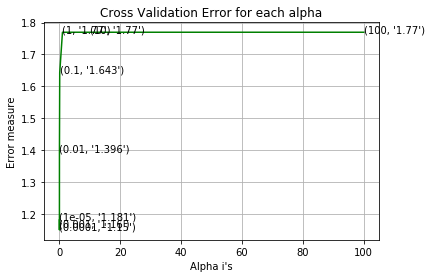

For values of best alpha =  0.0001 The train log loss is: 0.5939623314470914
For values of best alpha =  0.0001 The cross validation log loss is: 1.150345735413364
For values of best alpha =  0.0001 The test log loss is: 1.1531593861327538


In [214]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.150345735413364
Number of mis-classified points : 0.3383458646616541
-------------------- Confusion matrix --------------------


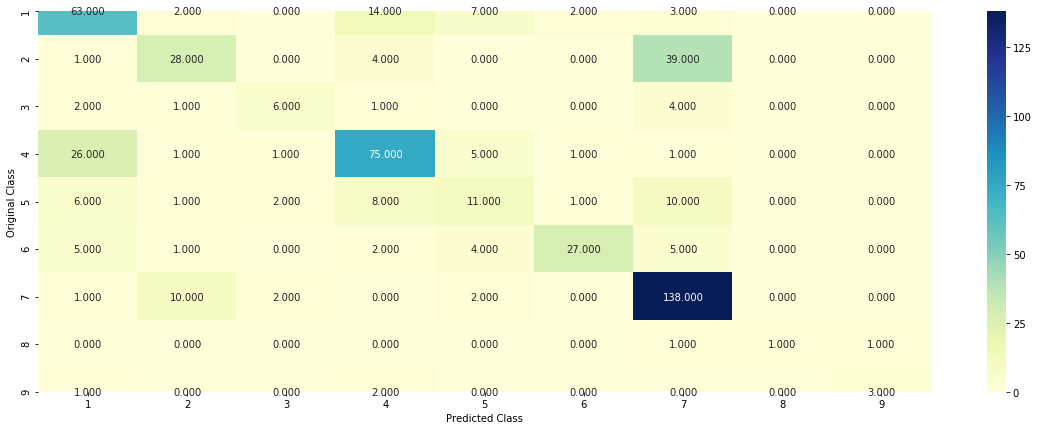

-------------------- Precision matrix (Columm Sum=1) --------------------


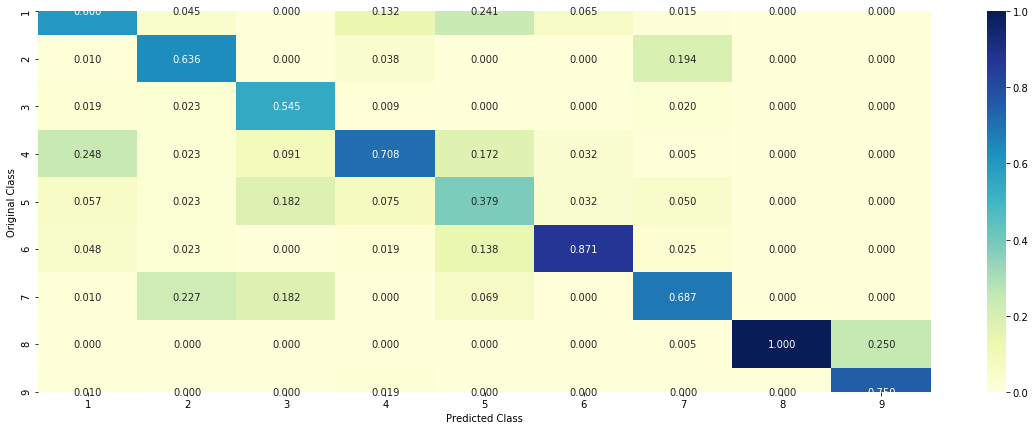

-------------------- Recall matrix (Row sum=1) --------------------


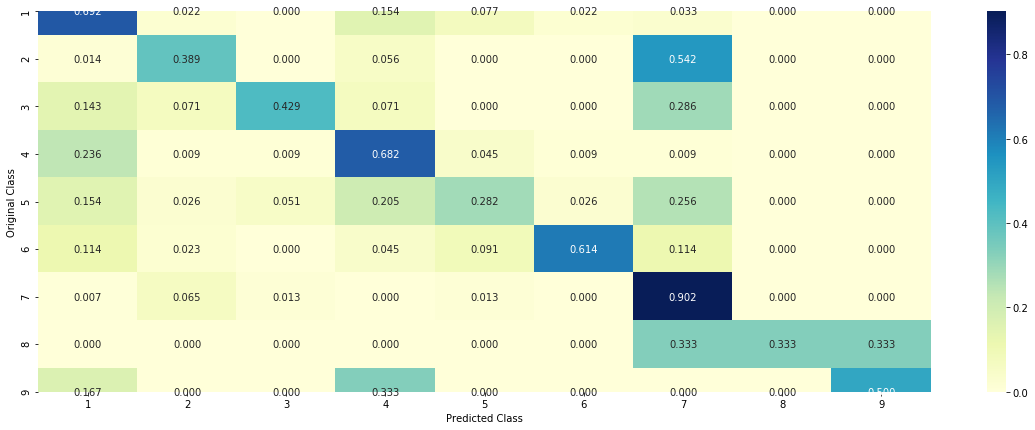

In [215]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [216]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(abs(-clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0889 0.1994 0.0051 0.0304 0.0476 0.0013 0.6227 0.0028 0.0018]]
Actual Class : 2
--------------------------------------------------
455 Text feature [go] present in test data point [True]
460 Text feature [vitro] present in test data point [True]
461 Text feature [receptor] present in test data point [True]
462 Text feature [shown] present in test data point [True]
467 Text feature [relative] present in test data point [True]
469 Text feature [selected] present in test data point [True]
471 Text feature [majority] present in test data point [True]
472 Text feature [basis] present in test data point [True]
473 Text feature [15] present in test data point [True]
474 Text feature [low] present in test data point [True]
475 Text feature [fusions] present in test data point [True]
478 Text feature [fusion] present in test data point [True]
479 Text feature [domains] present in test data point [True]
481 Text feature [proliferation] prese

<h4>4.3.3.2. For Incorrectly classified point</h4>

In [217]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(abs(-clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.0586 0.0355 0.0375 0.7775 0.0371 0.0121 0.0357 0.0036 0.0024]]
Actual Class : 4
--------------------------------------------------
464 Text feature [defined] present in test data point [True]
466 Text feature [showing] present in test data point [True]
467 Text feature [first] present in test data point [True]
469 Text feature [domains] present in test data point [True]
470 Text feature [18] present in test data point [True]
471 Text feature [characteristics] present in test data point [True]
474 Text feature [download] present in test data point [True]
475 Text feature [inactive] present in test data point [True]
477 Text feature [39] present in test data point [True]
478 Text feature [able] present in test data point [True]
479 Text feature [red] present in test data point [True]
480 Text feature [4a] present in test data point [True]
483 Text feature [majority] present in test data point [True]
484 Text feature [role] present in

<h2>4.5 Random Forest Classifier</h2>

<h3>4.5.1. Hyper paramter tuning (With One hot Encoding)</h3>

In [218]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.246619600679355
for n_estimators = 100 and max depth =  10
Log Loss : 1.2571150727912197
for n_estimators = 200 and max depth =  5
Log Loss : 1.2373239874153676
for n_estimators = 200 and max depth =  10
Log Loss : 1.2473972170904342
for n_estimators = 500 and max depth =  5
Log Loss : 1.2331734452846452
for n_estimators = 500 and max depth =  10
Log Loss : 1.2465535955361693
for n_estimators = 1000 and max depth =  5
Log Loss : 1.2308672540711683
for n_estimators = 1000 and max depth =  10
Log Loss : 1.243224870127878
for n_estimators = 2000 and max depth =  5
Log Loss : 1.229411651409887
for n_estimators = 2000 and max depth =  10
Log Loss : 1.2436499040978066
For values of best estimator =  2000 The train log loss is: 0.8584668284997796
For values of best estimator =  2000 The cross validation log loss is: 1.229411651409887
For values of best estimator =  2000 The test log loss is: 1.199456467120143


<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.229411651409887
Number of mis-classified points : 0.4342105263157895
-------------------- Confusion matrix --------------------


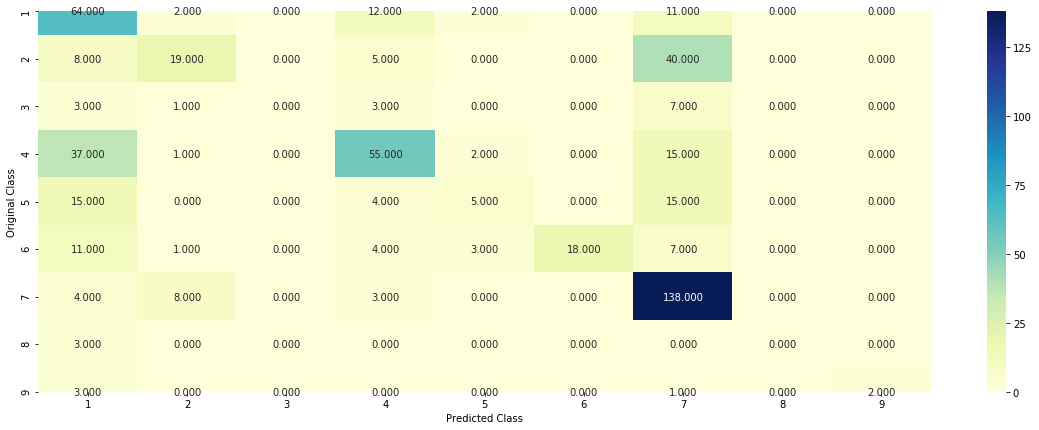

-------------------- Precision matrix (Columm Sum=1) --------------------


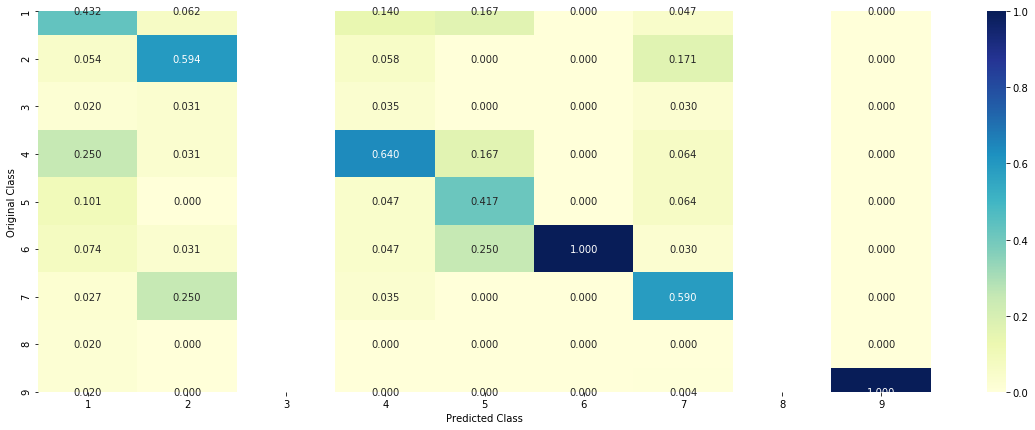

-------------------- Recall matrix (Row sum=1) --------------------


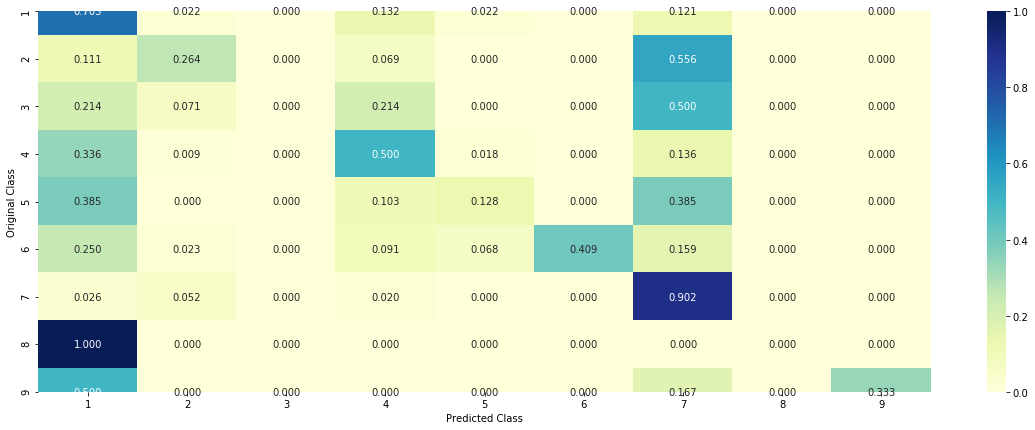

In [219]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [220]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0312 0.3695 0.0127 0.0345 0.0425 0.0394 0.4583 0.0076 0.0043]]
Actual Class : 2
--------------------------------------------------
0 Text feature [kinase] present in test data point [True]
2 Text feature [treatment] present in test data point [True]
3 Text feature [inhibitors] present in test data point [True]
5 Text feature [tyrosine] present in test data point [True]
6 Text feature [activation] present in test data point [True]
7 Text feature [inhibitor] present in test data point [True]
8 Text feature [phosphorylation] present in test data point [True]
9 Text feature [constitutive] present in test data point [True]
10 Text feature [function] present in test data point [True]
14 Text feature [oncogenic] present in test data point [True]
18 Text feature [receptor] present in test data point [True]
19 Text feature [therapy] present in test data point [True]
20 Text feature [kinases] present in test data point [True]
22 Text feature

<h4>4.5.3.2. Inorrectly Classified point</h4>

In [221]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.0583 0.0136 0.0372 0.7847 0.0345 0.028  0.0362 0.0027 0.0049]]
Actuall Class : 4
--------------------------------------------------
0 Text feature [kinase] present in test data point [True]
1 Text feature [activating] present in test data point [True]
3 Text feature [inhibitors] present in test data point [True]
4 Text feature [suppressor] present in test data point [True]
5 Text feature [tyrosine] present in test data point [True]
6 Text feature [activation] present in test data point [True]
7 Text feature [inhibitor] present in test data point [True]
8 Text feature [phosphorylation] present in test data point [True]
10 Text feature [function] present in test data point [True]
11 Text feature [activated] present in test data point [True]
13 Text feature [loss] present in test data point [True]
14 Text feature [oncogenic] present in test data point [True]
16 Text feature [missense] present in test data point [True]
17 Text feature 

<h3>4.5.3. Hyper paramter tuning (With Response Coding)</h3>

In [222]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
'''
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 1.9467581957307234
for n_estimators = 10 and max depth =  3
Log Loss : 1.666308900060312
for n_estimators = 10 and max depth =  5
Log Loss : 1.6338720465873353
for n_estimators = 10 and max depth =  10
Log Loss : 1.8167647425705025
for n_estimators = 50 and max depth =  2
Log Loss : 1.6096966611322383
for n_estimators = 50 and max depth =  3
Log Loss : 1.4431038974871229
for n_estimators = 50 and max depth =  5
Log Loss : 1.3631648595335981
for n_estimators = 50 and max depth =  10
Log Loss : 1.71497863771549
for n_estimators = 100 and max depth =  2
Log Loss : 1.4792673367576852
for n_estimators = 100 and max depth =  3
Log Loss : 1.4387177410236174
for n_estimators = 100 and max depth =  5
Log Loss : 1.3326785416579228
for n_estimators = 100 and max depth =  10
Log Loss : 1.7166966318385553
for n_estimators = 200 and max depth =  2
Log Loss : 1.5558706728841942
for n_estimators = 200 and max depth =  3
Log Loss : 1.4670125390886013


<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.332678541657923
Number of mis-classified points : 0.44548872180451127
-------------------- Confusion matrix --------------------


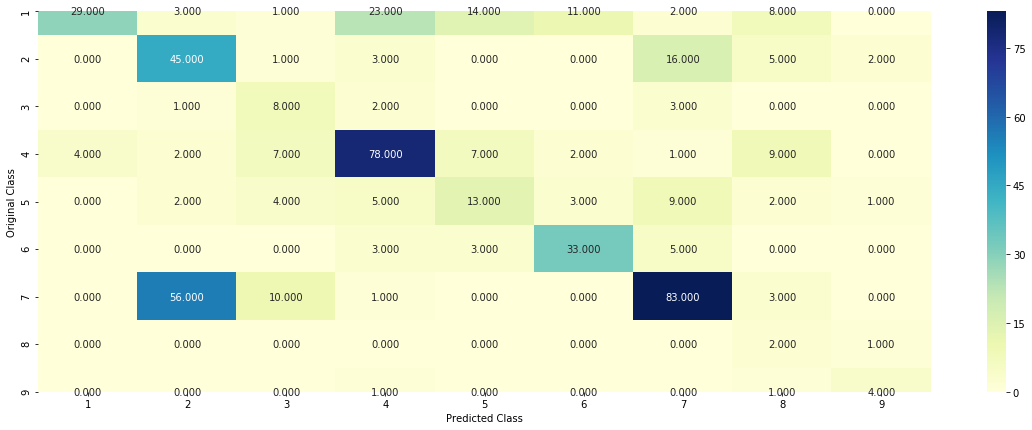

-------------------- Precision matrix (Columm Sum=1) --------------------


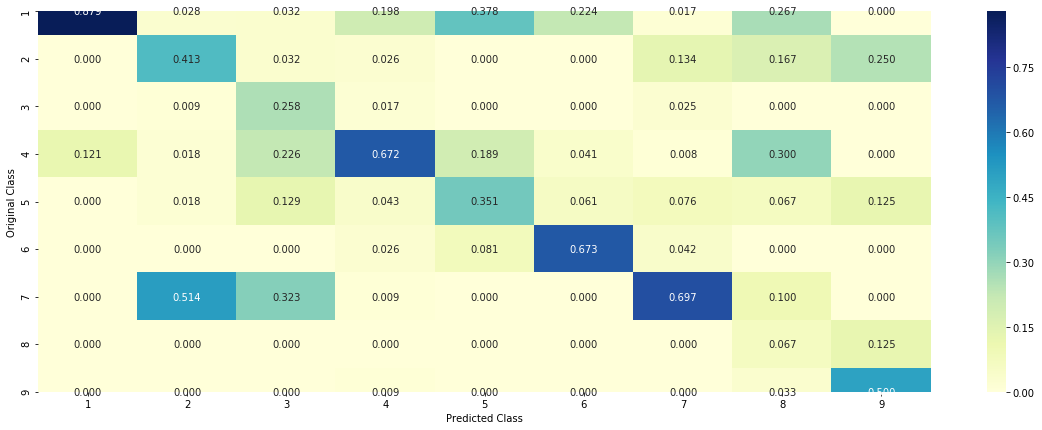

-------------------- Recall matrix (Row sum=1) --------------------


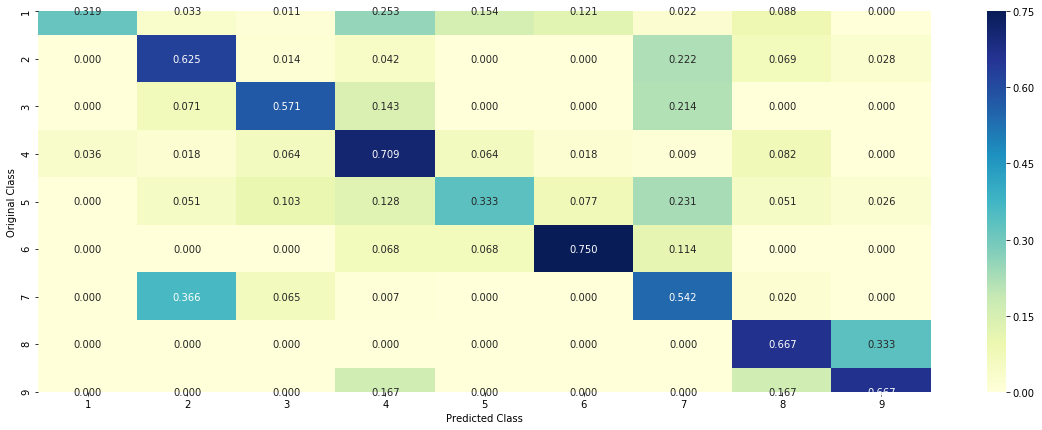

In [223]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [224]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


test_point_index = 3
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 2
Predicted Class Probabilities: [[0.0204 0.5295 0.035  0.0603 0.0187 0.0446 0.0212 0.1697 0.1004]]
Actual Class : 2
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Text is important feature
Gene is important feature


<h4>4.5.5.2. Incorrectly Classified point</h4>

In [226]:
test_point_index = 3
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 2
Predicted Class Probabilities: [[0.0204 0.5295 0.035  0.0603 0.0187 0.0446 0.0212 0.1697 0.1004]]
Actual Class : 2
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Text is important feature
Gene is important feature


<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [228]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# Logistic regression
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")


# Support vector machine (see the loss)
clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")

# Multinomial Naive bayes
clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error
print(best_alpha)

Logistic Regression :  Log Loss: 1.09
Support vector machines : Log Loss: 1.77
Naive Bayes : Log Loss: 1.19
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.178
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.034
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.512
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.152
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.181
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.332
1.1520808699504075


<h3>4.7.2 testing the model with the best hyper parameters</h3>

Log loss (train) on the stacking classifier : 0.801937822497199
Log loss (CV) on the stacking classifier : 1.1520808699504075
Log loss (test) on the stacking classifier : 1.1753692703862009
Number of missclassified point : 0.3879699248120301
-------------------- Confusion matrix --------------------


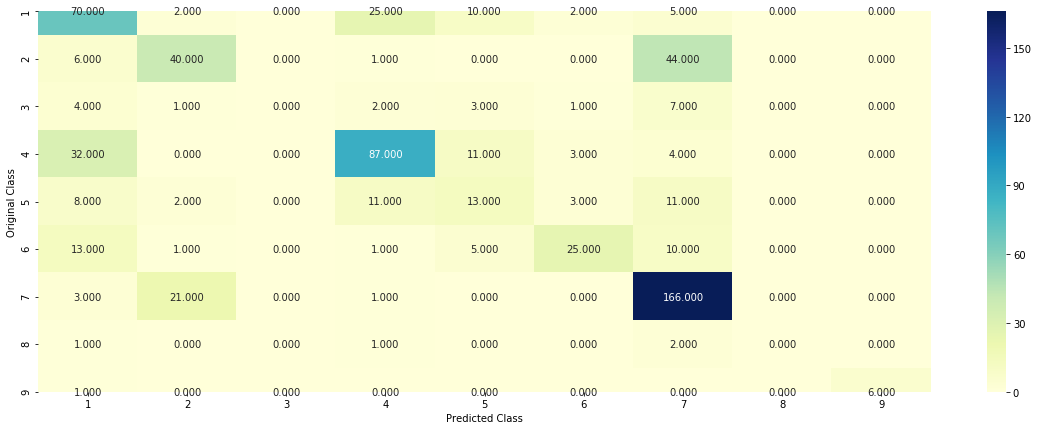

-------------------- Precision matrix (Columm Sum=1) --------------------


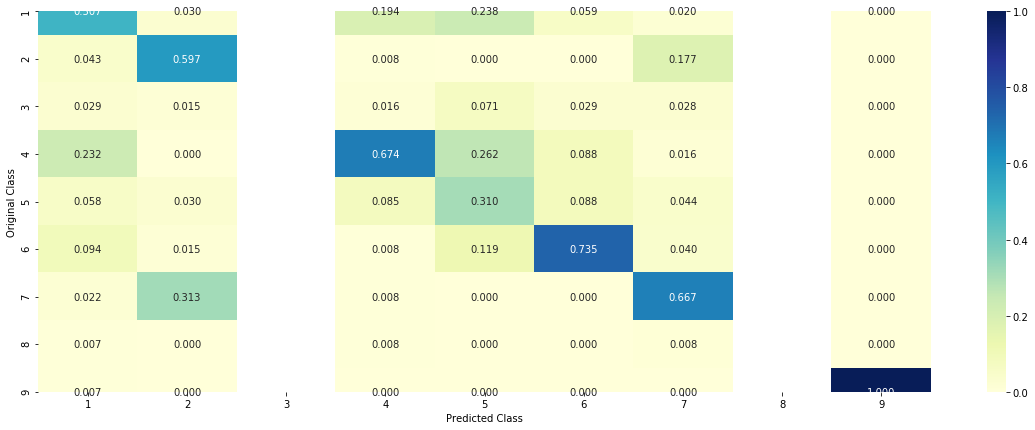

-------------------- Recall matrix (Row sum=1) --------------------


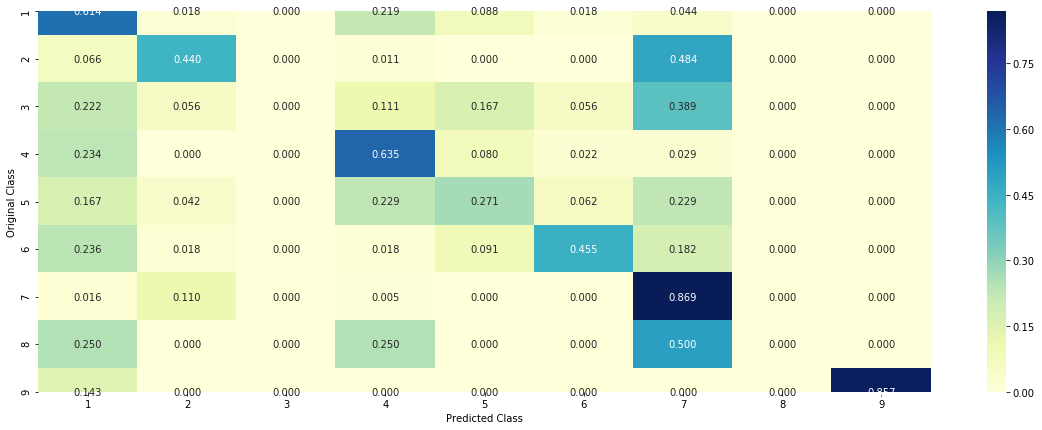

In [229]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.934675707086482
Log loss (CV) on the VotingClassifier : 1.2037023214693872
Log loss (test) on the VotingClassifier : 1.2286578518035731
Number of missclassified point : 0.3894736842105263
-------------------- Confusion matrix --------------------


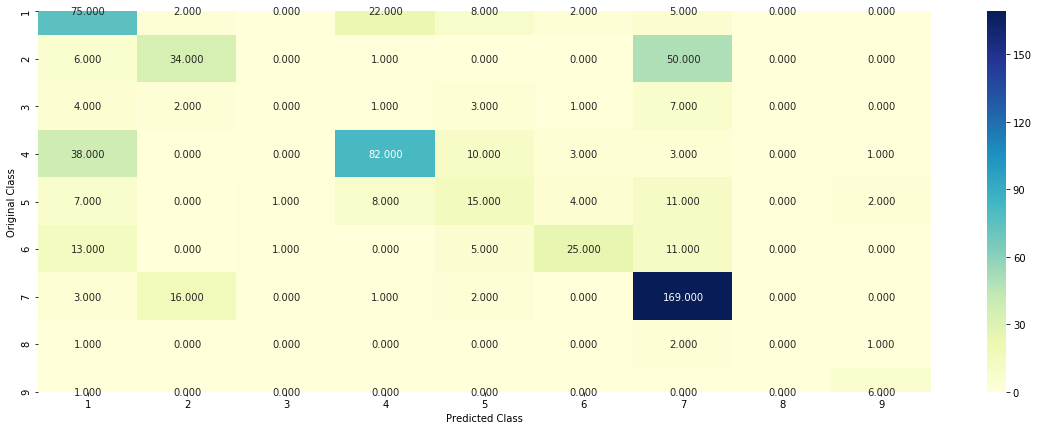

-------------------- Precision matrix (Columm Sum=1) --------------------


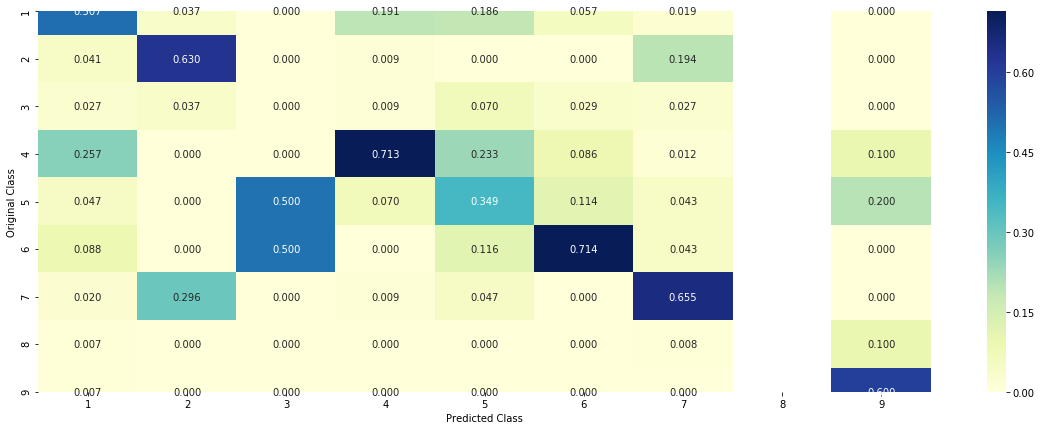

-------------------- Recall matrix (Row sum=1) --------------------


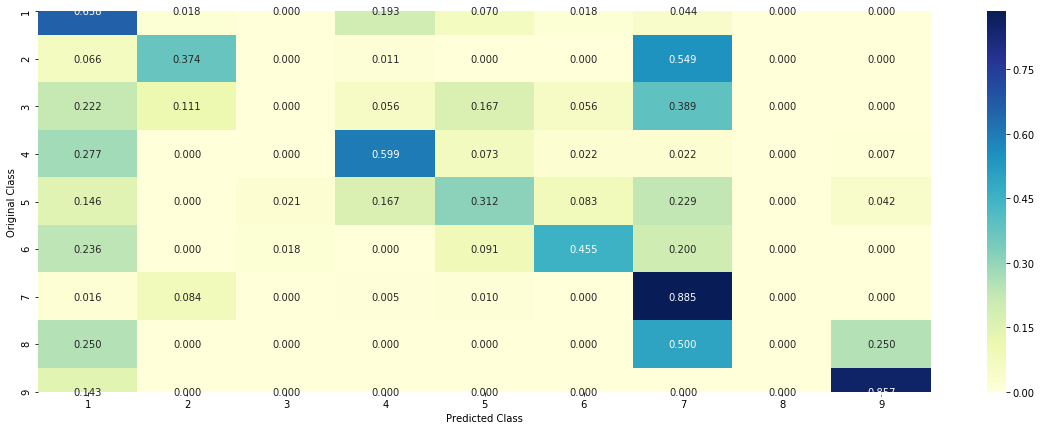

In [230]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))

## Apply Logistic regression with CountVectorizer Features, including both unigrams and bigrams

In [0]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer(ngram_range=(1,2))
    var_count_vec = CountVectorizer(ngram_range=(1,2))
    text_count_vec = CountVectorizer(min_df=3,ngram_range=(1,2))
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(tqdm(indices)):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

In [264]:
print(len(variation_vectorizer.vocabulary_))
print(len(text_vectorizer.vocabulary_))

2051
767936


In [0]:
gene_vectorizer = CountVectorizer(ngram_range=(1,2))
train_gene_feature_onehotCoding_bigram = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding_bigram = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding_bigram = gene_vectorizer.transform(cv_df['Gene'])
variation_vectorizer = CountVectorizer(ngram_range=(1,2))
train_variation_feature_onehotCoding_bigram = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding_bigram = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding_bigram = variation_vectorizer.transform(cv_df['Variation'])

In [0]:
text_vectorizer = CountVectorizer(min_df=3,ngram_range=(1,2))
train_text_feature_onehotCoding_bigram = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
#train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_feature_onehotCoding_bigram = normalize(train_text_feature_onehotCoding_bigram, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding_bigram = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding_bigram = normalize(test_text_feature_onehotCoding_bigram, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding_bigram = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding_bigram = normalize(cv_text_feature_onehotCoding_bigram, axis=0)

In [278]:
print(train_text_feature_onehotCoding_bigram.shape)
print()

(2124, 767936)



In [268]:
# STACKING ALL THE TRAIN USING HSTACK 
train_gene_var_onehotCoding_bigram = hstack((train_gene_feature_onehotCoding_bigram,train_variation_feature_onehotCoding_bigram))
test_gene_var_onehotCoding_bigram = hstack((test_gene_feature_onehotCoding_bigram,test_variation_feature_onehotCoding_bigram))
cv_gene_var_onehotCoding_bigram = hstack((cv_gene_feature_onehotCoding_bigram,cv_variation_feature_onehotCoding_bigram))

train_x_onehotCoding_bigram = hstack((train_gene_var_onehotCoding_bigram, train_text_feature_onehotCoding_bigram)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding_bigram = hstack((test_gene_var_onehotCoding_bigram, test_text_feature_onehotCoding_bigram)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding_bigram = hstack((cv_gene_var_onehotCoding_bigram, cv_text_feature_onehotCoding_bigram)).tocsr()
cv_y = np.array(list(cv_df['Class']))

print(train_x_onehotCoding_bigram.shape)
print(test_x_onehotCoding_bigram.shape)
print(cv_x_onehotCoding_bigram.shape)

(2124, 770222)
(665, 770222)
(532, 770222)


## LR WITH CLASS BALANCING AND USING BIGRAM

### Hyperparameter tuning with class balancing

for alpha = 1e-06
Log Loss : 1.5696234754095268
for alpha = 1e-05
Log Loss : 1.5590076632027419
for alpha = 0.0001
Log Loss : 1.4793968618979847
for alpha = 0.001
Log Loss : 1.2054945128257264
for alpha = 0.01
Log Loss : 1.200091692366162
for alpha = 0.1
Log Loss : 1.2608579419821064
for alpha = 1
Log Loss : 1.3500354326988646
for alpha = 10
Log Loss : 1.4043872736600045
for alpha = 100
Log Loss : 1.414045871416923


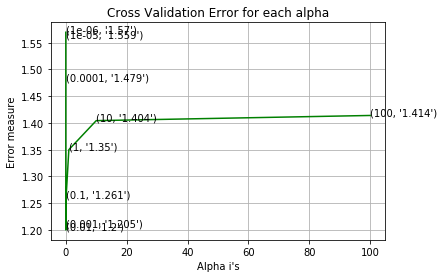

For values of best alpha =  0.01 The train log loss is: 0.6883796712731665
For values of best alpha =  0.01 The cross validation log loss is: 1.200091692366162
For values of best alpha =  0.01 The test log loss is: 1.2447838004138132


In [269]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding_bigram, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_bigram, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_bigram)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_bigram, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_bigram, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding_bigram)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_bigram)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_bigram)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

### Testing the model with best hyper paramters

Log loss : 1.200091692366162
Number of mis-classified points : 0.37781954887218044
-------------------- Confusion matrix --------------------


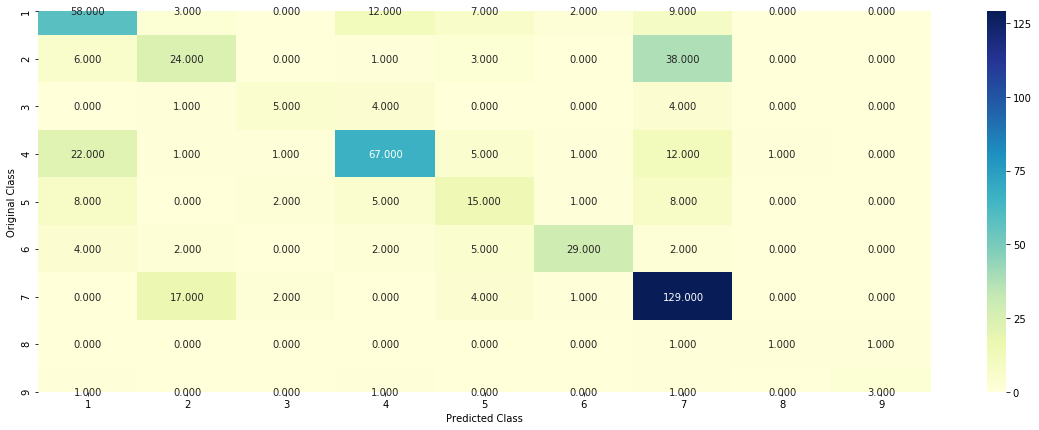

-------------------- Precision matrix (Columm Sum=1) --------------------


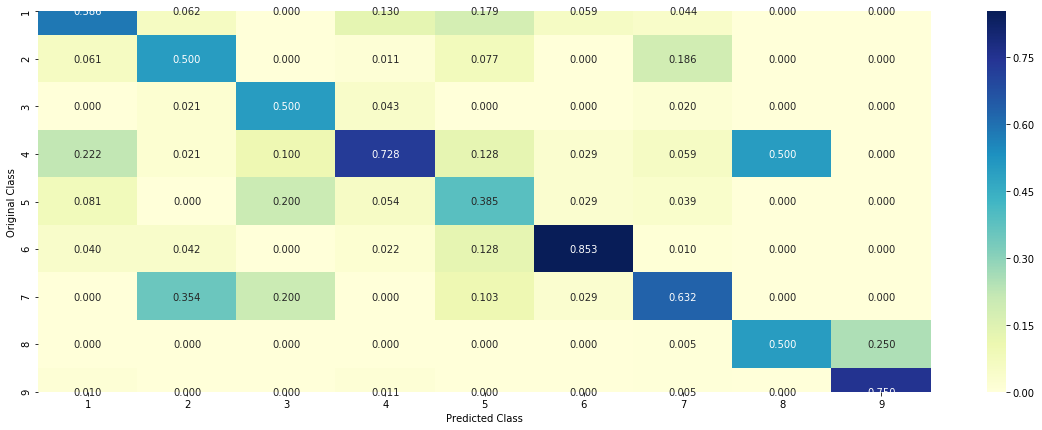

-------------------- Recall matrix (Row sum=1) --------------------


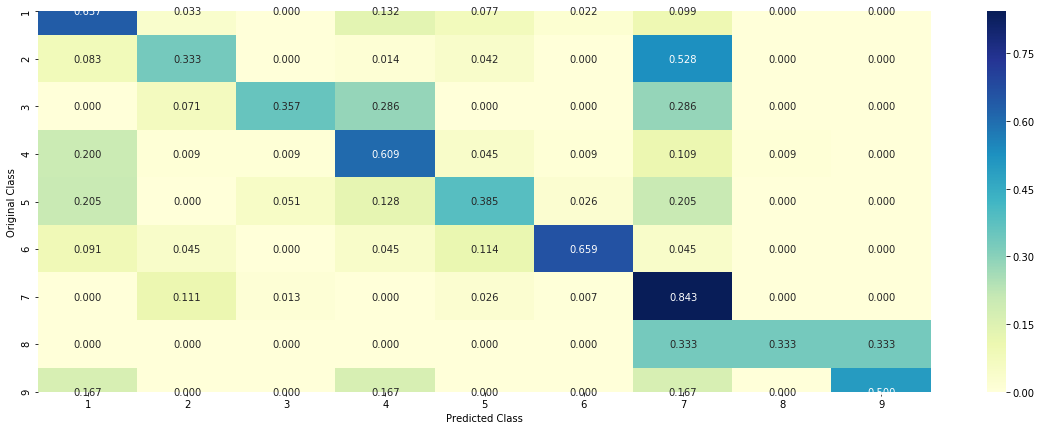

In [273]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding_bigram, train_y, cv_x_onehotCoding_bigram, cv_y, clf)

### Feature importance (since the dimention (2124, 770222) is very high, its taking approximately 2.5 hr to find )
 *  So neglecting feature importance for this

In [0]:
# Correctly classified point

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_bigram,train_y)
test_point_index = 2
no_feature = 385111
predicted_cls = sig_clf.predict(test_x_onehotCoding_bigram[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding_bigram[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

In [280]:
print(clf.coef_.shape)

(9, 770222)


In [0]:
# Incorrectly classified point

test_point_index = 3
no_feature = 385111
predicted_cls = sig_clf.predict(test_x_onehotCoding_bigram[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding_bigram[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

# 4: Trying to Reduce the CV and test log-loss to a value less than 1.0

In [0]:
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer(ngram_range=(1,2), max_features=3000)
    var_count_vec = CountVectorizer(ngram_range=(1,2), max_features=3000)
    text_count_vec = CountVectorizer(min_df=3,ngram_range=(1,2), max_features=3000)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(tqdm(indices)):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

In [0]:
gene_vectorizer = CountVectorizer(ngram_range=(1,2), max_features=3000)
train_gene_feature_onehotCoding_bigram = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding_bigram = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding_bigram = gene_vectorizer.transform(cv_df['Gene'])
variation_vectorizer = CountVectorizer(ngram_range=(1,2), max_features=3000)
train_variation_feature_onehotCoding_bigram = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding_bigram = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding_bigram = variation_vectorizer.transform(cv_df['Variation'])

In [0]:
text_vectorizer = CountVectorizer(min_df=3,ngram_range=(1,2), max_features=3000)
train_text_feature_onehotCoding_bigram = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
#train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_feature_onehotCoding_bigram = normalize(train_text_feature_onehotCoding_bigram, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding_bigram = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding_bigram = normalize(test_text_feature_onehotCoding_bigram, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding_bigram = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding_bigram = normalize(cv_text_feature_onehotCoding_bigram, axis=0)

In [306]:
# STACKING ALL THE TRAIN USING HSTACK 
train_gene_var_onehotCoding_bigram = hstack((train_gene_feature_onehotCoding_bigram,train_variation_feature_onehotCoding_bigram))
test_gene_var_onehotCoding_bigram = hstack((test_gene_feature_onehotCoding_bigram,test_variation_feature_onehotCoding_bigram))
cv_gene_var_onehotCoding_bigram = hstack((cv_gene_feature_onehotCoding_bigram,cv_variation_feature_onehotCoding_bigram))

train_x_onehotCoding_bigram = hstack((train_gene_var_onehotCoding_bigram, train_text_feature_onehotCoding_bigram)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding_bigram = hstack((test_gene_var_onehotCoding_bigram, test_text_feature_onehotCoding_bigram)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding_bigram = hstack((cv_gene_var_onehotCoding_bigram, cv_text_feature_onehotCoding_bigram)).tocsr()
cv_y = np.array(list(cv_df['Class']))

print(train_x_onehotCoding_bigram.shape)
print(test_x_onehotCoding_bigram.shape)
print(cv_x_onehotCoding_bigram.shape)


(2124, 5286)
(665, 5286)
(532, 5286)


## LR WITH CLASS BALANCING AND USING BIGRAM (with max features=2000)

### Hyperparameter tuning with class balancing

for alpha = 1e-06
Log Loss : 1.245669757810472
for alpha = 1e-05
Log Loss : 1.174608891497375
for alpha = 0.0001
Log Loss : 1.1038360467444042
for alpha = 0.001
Log Loss : 1.1510844540036655
for alpha = 0.01
Log Loss : 1.3552689172438424
for alpha = 0.1
Log Loss : 1.7806103742539185
for alpha = 1
Log Loss : 1.8190132000086028
for alpha = 10
Log Loss : 1.8222100489532107
for alpha = 100
Log Loss : 1.8225505493758807


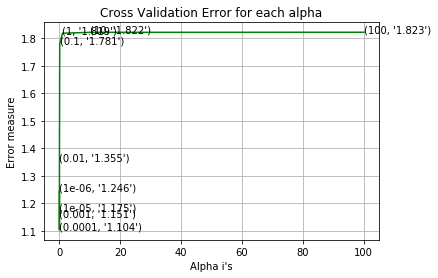

For values of best alpha =  0.0001 The train log loss is: 0.41235915430095
For values of best alpha =  0.0001 The cross validation log loss is: 1.1038360467444042
For values of best alpha =  0.0001 The test log loss is: 1.0588693671312688


In [307]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding_bigram, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_bigram, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_bigram)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_bigram, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_bigram, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding_bigram)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_bigram)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_bigram)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

### Testing the model with best hyper paramters

Log loss : 1.1038360467444042
Number of mis-classified points : 0.34022556390977443
-------------------- Confusion matrix --------------------


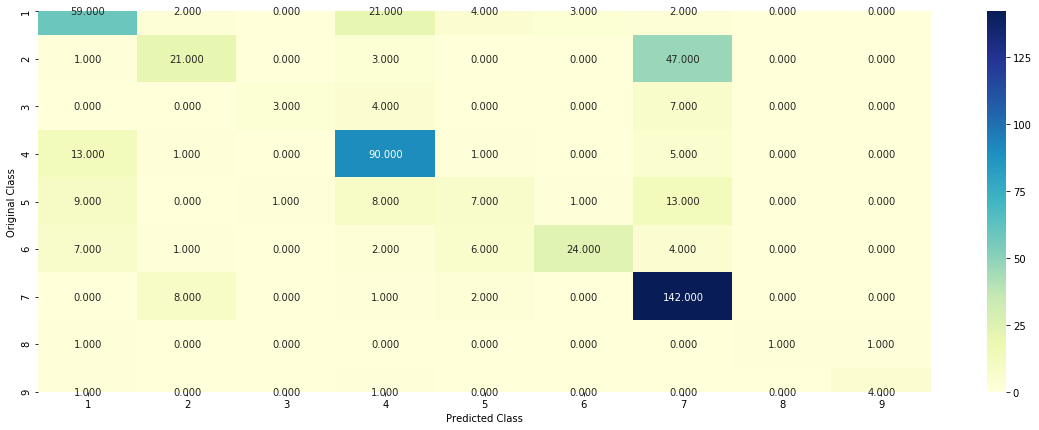

-------------------- Precision matrix (Columm Sum=1) --------------------


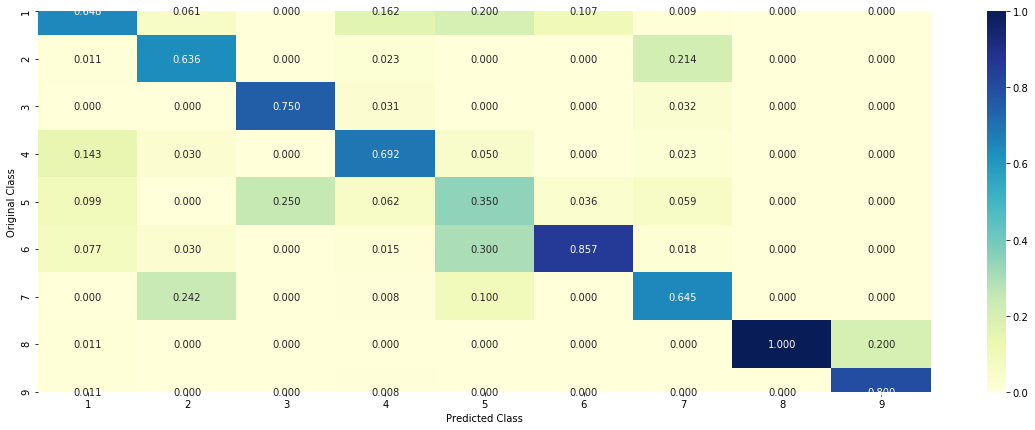

-------------------- Recall matrix (Row sum=1) --------------------


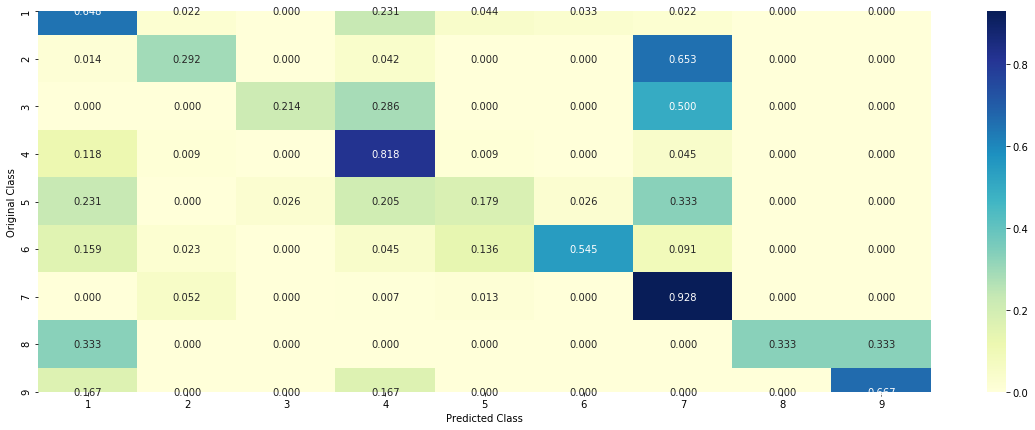

In [308]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding_bigram, train_y, cv_x_onehotCoding_bigram, cv_y, clf)

### Feature importance

In [309]:
print(clf.coef_.shape)

(9, 5286)


In [310]:
# Correctly classified point

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_bigram,train_y)
test_point_index = 2
no_feature = 200
predicted_cls = sig_clf.predict(test_x_onehotCoding_bigram[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding_bigram[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[2.900e-03 1.793e-01 1.060e-02 4.800e-03 4.400e-03 2.300e-03 7.931e-01
  2.400e-03 2.000e-04]]
Actual Class : 7
--------------------------------------------------



 61%|██████    | 122/200 [00:00<00:00, 368.50it/s]

70 Text feature [downstream] present in test data point [True]
71 Text feature [intrinsic] present in test data point [True]
84 Text feature [biopsies] present in test data point [True]
88 Text feature [cdnas] present in test data point [True]
107 Text feature [technology] present in test data point [True]
116 Text feature [nude] present in test data point [True]



100%|██████████| 200/200 [00:00<00:00, 366.94it/s]

167 Text feature [concentrations] present in test data point [True]
Out of the top  200  features  7 are present in query point


In [311]:
# Incorrectly classified point

test_point_index = 4
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding_bigram[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding_bigram[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[5.100e-03 4.080e-02 1.400e-03 5.900e-03 3.900e-03 3.200e-03 9.373e-01
  2.100e-03 2.000e-04]]
Actual Class : 5
--------------------------------------------------



100%|██████████| 100/100 [00:00<00:00, 442.21it/s]

70 Text feature [downstream] present in test data point [True]
86 Text feature [constitutive] present in test data point [True]
Out of the top  100  features  2 are present in query point


## LR with class Balance and Dimentionality reduction

In [0]:
gene_vectorizer = CountVectorizer(ngram_range=(1,2), max_features=10000)
train_gene_feature_onehotCoding_bigram = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding_bigram = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding_bigram = gene_vectorizer.transform(cv_df['Gene'])
variation_vectorizer = CountVectorizer(ngram_range=(1,2), max_features=10000)
train_variation_feature_onehotCoding_bigram = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding_bigram = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding_bigram = variation_vectorizer.transform(cv_df['Variation'])

In [0]:
text_vectorizer = CountVectorizer(min_df=3,ngram_range=(1,2), max_features=10000)
train_text_feature_onehotCoding_bigram = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
#train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_feature_onehotCoding_bigram = normalize(train_text_feature_onehotCoding_bigram, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding_bigram = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding_bigram = normalize(test_text_feature_onehotCoding_bigram, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding_bigram = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding_bigram = normalize(cv_text_feature_onehotCoding_bigram, axis=0)

In [142]:
# STACKING ALL THE TRAIN USING HSTACK 
train_gene_var_onehotCoding_bigram = hstack((train_gene_feature_onehotCoding_bigram,train_variation_feature_onehotCoding_bigram))
test_gene_var_onehotCoding_bigram = hstack((test_gene_feature_onehotCoding_bigram,test_variation_feature_onehotCoding_bigram))
cv_gene_var_onehotCoding_bigram = hstack((cv_gene_feature_onehotCoding_bigram,cv_variation_feature_onehotCoding_bigram))

train_x_onehotCoding_bigram = hstack((train_gene_var_onehotCoding_bigram, train_text_feature_onehotCoding_bigram)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding_bigram = hstack((test_gene_var_onehotCoding_bigram, test_text_feature_onehotCoding_bigram)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding_bigram = hstack((cv_gene_var_onehotCoding_bigram, cv_text_feature_onehotCoding_bigram)).tocsr()
cv_y = np.array(list(cv_df['Class']))

print(train_x_onehotCoding_bigram.shape)
print(test_x_onehotCoding_bigram.shape)
print(cv_x_onehotCoding_bigram.shape)

(2124, 12287)
(665, 12287)
(532, 12287)


### Dimentionality reduction

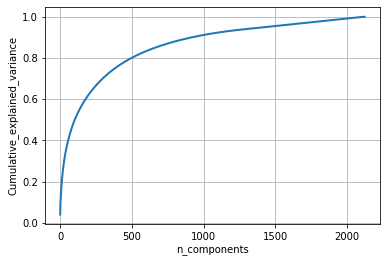

In [143]:
svd = TruncatedSVD()
svd.n_components = 12286
svd_data = svd.fit_transform(train_x_onehotCoding_bigram)

percentage_var_explained = svd.explained_variance_ / np.sum(svd.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)


# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

### OBSERVATION

* At dimention 1500 around 90% of the variance is preserved. hence reducing the dimention and applying the Logistic regression on top of it.

In [0]:
svd = TruncatedSVD()
svd.n_components = 1500
train_x_onehotCoding_bigram_svd = svd.fit_transform(train_x_onehotCoding_bigram)
test_x_onehotCoding_bigram_svd  = svd.transform(test_x_onehotCoding_bigram)
cv_x_onehotCoding_bigram_svd  = svd.transform(cv_x_onehotCoding_bigram)

In [145]:
print(train_x_onehotCoding_bigram_svd.shape)
print(test_x_onehotCoding_bigram_svd.shape)
print(cv_x_onehotCoding_bigram_svd.shape)

(2124, 1500)
(665, 1500)
(532, 1500)


### LR Hyperparameter tuning with class balancing

for alpha = 1e-06
Log Loss : 1.14336138370509
for alpha = 1e-05
Log Loss : 1.1275629029754934
for alpha = 0.0001
Log Loss : 1.0412494550950708
for alpha = 0.0009
Log Loss : 1.017131145039271
for alpha = 0.0008
Log Loss : 1.0159771679508658
for alpha = 0.001
Log Loss : 1.0185510463346683
for alpha = 0.009
Log Loss : 1.1216767240668735
for alpha = 0.005
Log Loss : 1.0811112236010776
for alpha = 0.01
Log Loss : 1.1290119390255042
for alpha = 0.1
Log Loss : 1.2397588015176333
for alpha = 1
Log Loss : 1.4486290766449252


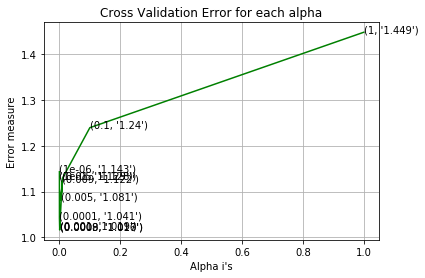

For values of best alpha =  0.0008 The train log loss is: 0.6058299153819398
For values of best alpha =  0.0008 The cross validation log loss is: 1.0159771679508658
For values of best alpha =  0.0008 The test log loss is: 0.9870238594589086


In [149]:
alpha = [1e-06, 1e-05, 0.0001,0.0009,0.0008, 0.001,0.009,0.005, 0.01, 0.1, 1]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding_bigram_svd, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_bigram_svd, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_bigram_svd)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_bigram_svd, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_bigram_svd, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding_bigram_svd)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_bigram_svd)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_bigram_svd)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

### Testing the model with best hyper paramters

Log loss : 1.0159771679508658
Number of mis-classified points : 0.34398496240601506
-------------------- Confusion matrix --------------------


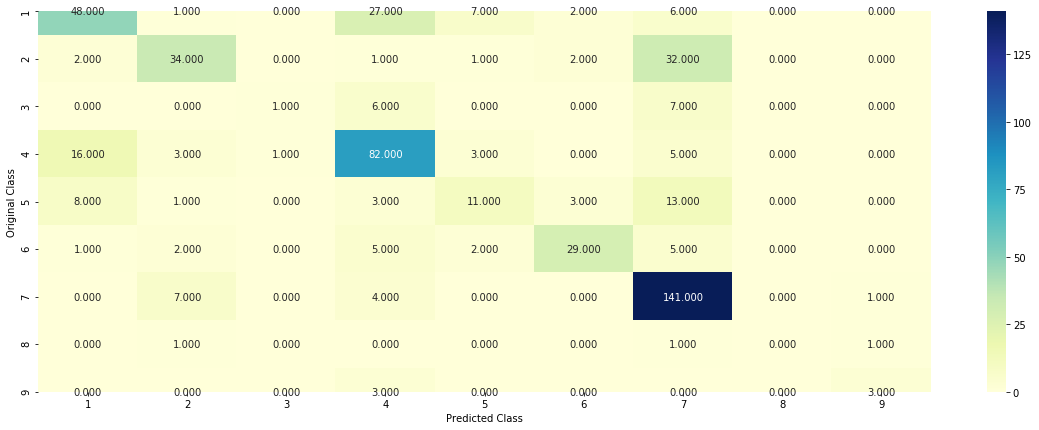

-------------------- Precision matrix (Columm Sum=1) --------------------


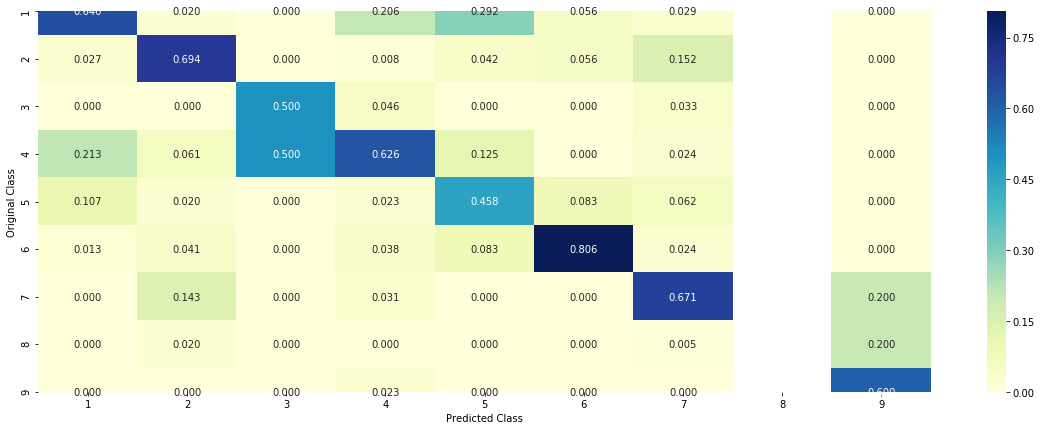

-------------------- Recall matrix (Row sum=1) --------------------


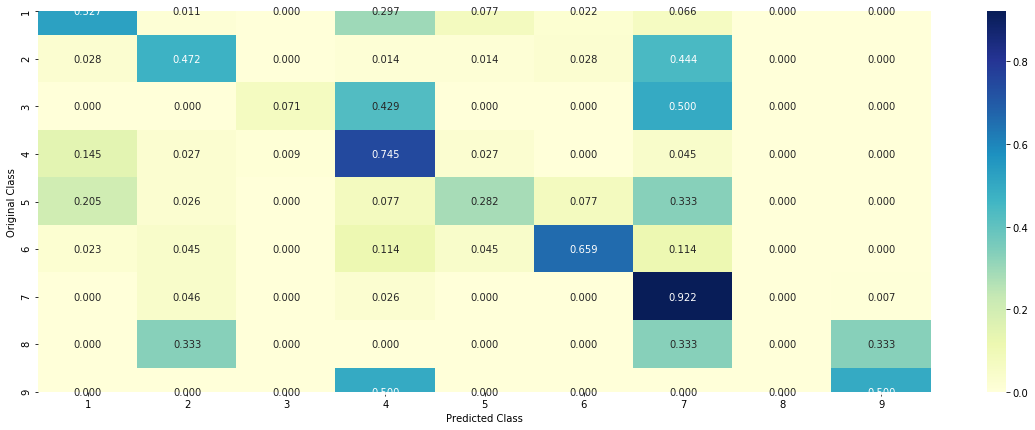

In [150]:

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding_bigram_svd, train_y, cv_x_onehotCoding_bigram_svd, cv_y, clf)

In [151]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["S:no","Machine_learning Model", "Feature_engineering_technique","Hyper parameter","Train:log loss","Cross_validation:log loss", "Test:log loss","Mis-classification"]

x.add_row(["1","Random model", "---", "----", "----","-----","----","----"])
x.add_row(["2","Naive Bayes", "TermFeq-InverseDocFeq", "Alpha = 0.001", 0.72 ,1.18,1.23,"0.38"])
x.add_row(["3","KNN", "TermFeq-InverseDocFeq" , "K = 5" , 0.48, 1.01,1.09,"0.32"])
x.add_row(["4","LR(Balanced)", "TermFeq-InverseDocFeq", " Alpha = 0.0001", 0.48 , 1.01,1.09,"0.33"])
x.add_row(["5","LR(Imbalanced)", "TermFeq-InverseDocFeq", "Alpha = 0.0001", 0.56, 1.08,1.05,"0.34"])
x.add_row(["6","Linear SVM", "TermFeq-InverseDocFeq", "Alpha = 0.0001", 0.59, 1.15,1.15,"0.33"])
x.add_row(["7","Random Forest", "TermFeq-InverseDocFeq", "n_estimators = 2000 | max depth =  5", 0.85,1.12,1.19,"0.43"])
x.add_row(["8","Random Forest", "Response_Encoding", "n_estimators = 100 | max depth =  5", 1.39,0.53,1.38,"0,44"])
x.add_row(["9","Stacking(LR,SVM,NB)","TermFeq-InverseDocFeq"  , "Alpha = 0.1", 0.80,1.15,1.17,"0.38"])
x.add_row(["10","Max Voting(RF,LR,SVM)", "TermFeq-InverseDocFeq", "----", 0.93,1.203,1.228,"0.38"])
#x.add_row(["LR(Balanced) ,Tfidf(TOP-1000, SVD-2000)", "" , "", 0.992,0.31,"",""])
x.add_row(["11","Logistic regression(balanced)", "BOW, without max_features, Unigram+Bigram", "alpha 0.01", 0.688,1.2,1.2,"0.37"])
x.add_row(["12","Logistic regression(balanced)", "BOW, max_features=1000,Unigram+Bigram", "alpha 0.01", 0.688,1.2,1.2,"0.36"])
x.add_row(["13","Logistic regression(balanced)", "BOW, max_features=2000,Unigram+Bigram", "alpha 0.01", 0.424,1.08,1.05,"0.34"])
x.add_row(["14","Logistic regression(balanced)", "BOW, max_features=3000,Unigram+Bigram", "alpha 0.0001", 0.412,1.10,1.05,"0.34"])
x.add_row(["15","Logistic regression(balanced)", "Unigram+Bigram+Dimentionality_reduction(SVD)", "SVD: 90% variance | alpha 0.0008", 0.61,1.01,0.987,"0.34"])

print(x)

+------+-------------------------------+----------------------------------------------+--------------------------------------+----------------+---------------------------+---------------+--------------------+
| S:no |     Machine_learning Model    |        Feature_engineering_technique         |           Hyper parameter            | Train:log loss | Cross_validation:log loss | Test:log loss | Mis-classification |
+------+-------------------------------+----------------------------------------------+--------------------------------------+----------------+---------------------------+---------------+--------------------+
|  1   |          Random model         |                     ---                      |                 ----                 |      ----      |           -----           |      ----     |        ----        |
|  2   |          Naive Bayes          |            TermFeq-InverseDocFeq             |            Alpha = 0.001             |      0.72      |            1.18     

# Conclusion:

* As there are 15 different model is tried, among those lowest log_loss is for [ Logistic Regression + Unigram and Bigram With max_features =10000 +  Dimentionality reduction techique (Singular value Decomposotion) method ] 

* The Worst model is Random forest with Response encoding, which overfits on train data by huge margin gave 44% misclassification error

* The Knn performs well with lowest of 32% misclassification error

* Balanced Dataset performs well as compared to imbalanced dataset

* Tfidf Techniues performs well as compared to One hot encoding techniques in almost all the model

* Word2vec is not tried, since the pretrained glove vector uses wikipedia/news data. But, the problem at hand is medical domain. may be most of the words vector represenation will not be avaliable there (hence w2v and Avg W2v is not tried)

---
**The top 3 models among 15 tries are [on basis of test Log_loss as metric]**


```

* Balanced Logistic regression + One hot encoding + Unigram + Bigram + top 10000 + Dimentionality Reduction
* Knn on Tfidf
* Balanced Logistic regression + Tfidf top 1000 features
```







